# Bushfire Analysis using Meteorological Data



Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- psych
- ggplot2
- reshape2
- car
- corrplot
- GGally
- gridExtra
- grid
- olsrr
- randomForest
- gbm

## Table of Contents

1. [Introduction](#sec_1)
2. [Data Exploration](#sec_2)
    + [2.1 Exploring the dataset](#sec_2.1)
        + [2.1.1 General Exploration of All Attributes](#sec_2.1.1)
        + [2.1.2 Statistical Exploration of All Attributes](#sec_2.1.2)
        + [2.1.3 Graphical Exploration of All Attributes](#sec_2.1.3)
    + [2.2 Exploration of Individual Variables](#sec_2.2)
        + [2.2.1 Statsitcal Exploration of Individual Variables](#sec_2.2.1)
        + [2.2.2 Graphical Exploration of Individual Variables](#sec_2.2.2)
    + [2.3 Correlation (Association Between Variables)](#sec_2.3)
        + [ 2.3.1 Correlation Between Numerical Variables](#sec_2.3.1)
        + [2.3.2 Relationship between Categorical and Numerical vairbale](#sec_2.3.2)
    + [2.4 Outliers Test and Treatment](#sec_2.4)
        + [2.4.1 Outliers Detection Using Cook's Distance](#sec_2.4.1)
        + [2.4.2 Outliers Treatment](#sec_2.4.2)
    + [2.5 Features Selection Based on Exploratory Data Analysis](#sec_2.5)
    
    
3. [Model Development](#sec_3)
    + [3.1 Data Preparation](#sec_3.1)
    + [3.2 Linear Regression](#sec_3.2)
        + [3.2.1 Basic Linear Model](#sec_3.2.1)
        + [3.2.2 Linear Model Enhancemnt](#sec_3.2.2)
        + [3.2.3 Conclusion of Linear Model](#sec_3.2.3)
    + [3.3 Random Forest](#sec_3.3)
    + [3.4 Boosted Tree](#sec_3.4)
    
    
4. [Model Comparison](#sec_4)
    + [4.1 Performance of the Lineare Regression Model](#sec_4.1)
    + [4.2 Performance of the Random Forest](#sec_4.2)
    + [4.3 Performance of Boosted Tree](#sec_4.3)
    + [4.4 Conclusion of Models Comparison](#sec_4.4)
    
    
5. [Variable Identification and Explanation](#sec_5)
    + [5.1 Variable Importance by Exploratory Data Analysis (EDA)](#sec_5.1)
    + [5.2 Variable Importance by Boosted Tree Model](#sec_5.2)
    
    
6. [Conclusion](#sec_6)

## 1. Introduction <a class="anchor" id="sec_1"></a>

In this project, <u>my aim is to build an ideal model to predict the burned area of forest fire</u>. The prediction is performed on the basis of identifying the main factor or factors contributing to the forest fires. In addition, <u>this project focuses on exploring the interrelationship between the different factors and how they influence each other</u>.  

The working dataset is the <u>Forest Fire Dataset</u> provided by *UCI Machine Learning Repository*. The main factors provided in the dataset can be devided into three categories: geographical location, weather elements, and fire indexes. 



In [73]:
#turn off warnings to avoid any warngings when running the codes 
warn = getOption("warn")
options(warn=-1)
options(warn=warn)

In [74]:
#import required libraries

library(psych) #For advanced statistcs (describe())
library(ggplot2) #For plots
library(reshape2) #For melt() function 
library("car") #For normality test plots
library(corrplot) #For correlation matrix plot
library(GGally) #To plot the correlogram
library(gridExtra) #To design a layout for plots
library(grid) #To design a layout for plots
library(olsrr) #For Cook's Distance function 
library(randomForest) #For Random Forst model 
library(gbm) #For Boosted Tree model 

### 2.1 Exploring the dataset <a class="anchor" id="sec_2.1"></a>

This section consists of general, statistical, and graphical exploration of all attributes.

#### 2.1.1 General Exploration of All Attributes <a class="anchor" id="sec_2.1.1"></a>

This part performs initial and general exploration of the dataset. It includes loading the dataset, generating a summary, viewing a subset of the dataset, and displaying the metadata.

In [75]:
#importing the dataset
forestFire = read.csv('forestfires.csv')

In [76]:
#view the dataset structure
cat("The Bush Fire dataset has", nrow(forestFire),
    "records, each with", ncol(forestFire),'attributes')

The Bush Fire dataset has 517 records, each with 13 attributes

In [77]:
#view the attributes names 
cat("The attributes names are:\n", attributes(forestFire)$names)

The attributes names are:
 X Y month day FFMC DMC DC ISI temp RH wind rain area

In [78]:
#view the attributes names and samples 
cat("The dataset structure is:\n\n")
str(forestFire)

The dataset structure is:

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


In [79]:
#inspect the first few records
cat("\nThe first few records in the dataset:")
head(forestFire)

#inspect the last few records
cat("\nThe last few records in the dataset:")
tail(forestFire)


The first few records in the dataset:

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0



The last few records in the dataset:

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0,0.00
513,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0,6.44
514,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0,54.29
515,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0,11.16
516,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0,0.00
517,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0,0.00


In [80]:
#view the statistical summary 
cat("Basic statistics for each attribute are:")
summary(forestFire)

Basic statistics for each attribute are:

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

#### - Summary of The Attributes 

The below table represents a general description of the  attributes. In addition to initial obersvations based on the pervious summary. 


|Attribute  |Type       |Sub-type  |Comments|
|-----------|-----------|----------|--------------------------------------------------------------------------------------|
|X          |Numerical|Continuous   |x-axis coordinate (from 1 to 9)|
|Y          |Numerical  |Continuous|y-axis coordinate (from 1 to 9)| 
|month      |Categorical  |Nominal  |Month of the year (January to December)- the majority of fires occured in August and September                                |
|day        |Categorical  |Nominal  |Day of the week (Monday to Sunday)-the fires occured on each day of the week, and increased on weekends (Friday to Sunday) |
|FFMC       |Numerical  |Continuous|(Fine Fuel Moisture Code) Ranges from 18.70 to 96.2-could have outliers                                        |
|DMC        |Numerical  |Continuous|(Duff Moisture Code) Ranges from 1.1 to 291.3                             |
|DC         |Numerical|Continuous   |(Drought Code) Ranges from 7.9 to 860
|ISI        |Numerical|Continuous   |(Initial Spread Index) Ranges from 0 to 56.1-could have outliers                                                        |
|temp       |Numerical|Continuous   |Outside temperature (in ◦ C)Ranges from 2.20 to 33.30|
|RH         |Numerical  |Continuous  |Outside relative humidity (in %)Ranges from 15 to 100                                                       |
|wind       |Numerical|Continuous   |Outside wind speed (in km/h)Ranges from 0.4 to 9.4  
|rain       |Numerical  |Continuous  |Outside rain (in mm/m 2 )Ranges from 0 to 6.4, most days are not rainy with a mean of 0.02166-could have outliers.                                                       |
|area       |Numerical|Continuous   |Total burned area (in ha)Ranges from 9 to 1090.84-could have outliers.



#### - Fire Weather Indices  (FWI)
In order to analyse the FWI descriptive statsics, the below table of the International Rating of FWI is attached. 



|Hazard Rating   |FFMC  |DMC  |DC  |ISI  |
|-------------|----|---|--|---|
|Low |0-76|0-21|0-79|0-1.5|
|Moderate|77-84|22-27|80-189|2-4| 
|High|85-88|28-40|190-299|5-8|
|Very High|89-91|41-60|300-424|9-15||16+|
|Extreme|92+|61+|425+|16+|


#### 2.1.2 Statistical Exploration of All Attributes <a class="anchor" id="sec_2.1.2"></a>

This section explores the statistics of the numerical columns. The columns `month` and `day` are excluded as they are categorical columns.

In [81]:
#use describe() function to view descriptive statistcs
round(describe(forestFire[, -c(3,4)]), 3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X,1,517,4.669,2.314,4.00,4.672,2.965,1.0,9.00,8.00,0.036,-1.180,0.102
Y,2,517,4.300,1.230,4.00,4.308,1.483,2.0,9.00,7.00,0.415,1.378,0.054
FFMC,3,517,90.645,5.520,91.60,91.455,1.927,18.7,96.20,77.50,-6.537,66.139,0.243
DMC,4,517,110.872,64.046,108.30,106.522,51.743,1.1,291.30,290.20,0.544,0.179,2.817
DC,5,517,547.940,248.066,664.20,578.692,118.905,7.9,860.60,852.70,-1.094,-0.265,10.910
ISI,6,517,9.022,4.559,8.40,8.727,3.113,0.0,56.10,56.10,2.522,21.146,0.201
temp,7,517,18.889,5.807,19.30,19.091,5.337,2.2,33.30,31.10,-0.329,0.111,0.255
RH,8,517,44.288,16.317,42.00,42.706,14.826,15.0,100.00,85.00,0.858,0.409,0.718
wind,9,517,4.018,1.792,4.00,3.899,1.927,0.4,9.40,9.00,0.568,0.030,0.079
rain,10,517,0.022,0.296,0.00,0.000,0.000,0.0,6.40,6.40,19.702,415.597,0.013


<u> Some observations from the Summary:</u>
- `FFMC` has a wide range with a minimum value of 18.7 and a maximum value 96.20.
- `ISI` seems to have a wide range starting from 9.022 up to 56.10.   
- It can be noted that `DC` has a wide range, with a minimum value of 7.9 and a maximum value of 860.60. 
- The mean in `rain` is close to 0 with a miximum of 6.40, the attribute might includes outliers.
- `area` starts from 0 which suggests the possibility of having unburned areas.
- There is a big range for `area` column.
- It can be noted that `area` and `rain` show a high skewness levels with 12.772 and 19.702 respectivley.

#### 2.1.3 Graphical Exploration of All Attributes  <a class="anchor" id="sec_2.1.3"></a>


This part applies graphical representation using boxplot to explore the dataset. The section contains three boxplots, the first graph contains all the attributes. The second graph illustrates side-by-side boxplots. Finally, the last plot represents side-by-side boxplot with individual scale for each variable.  

`Boxplot`

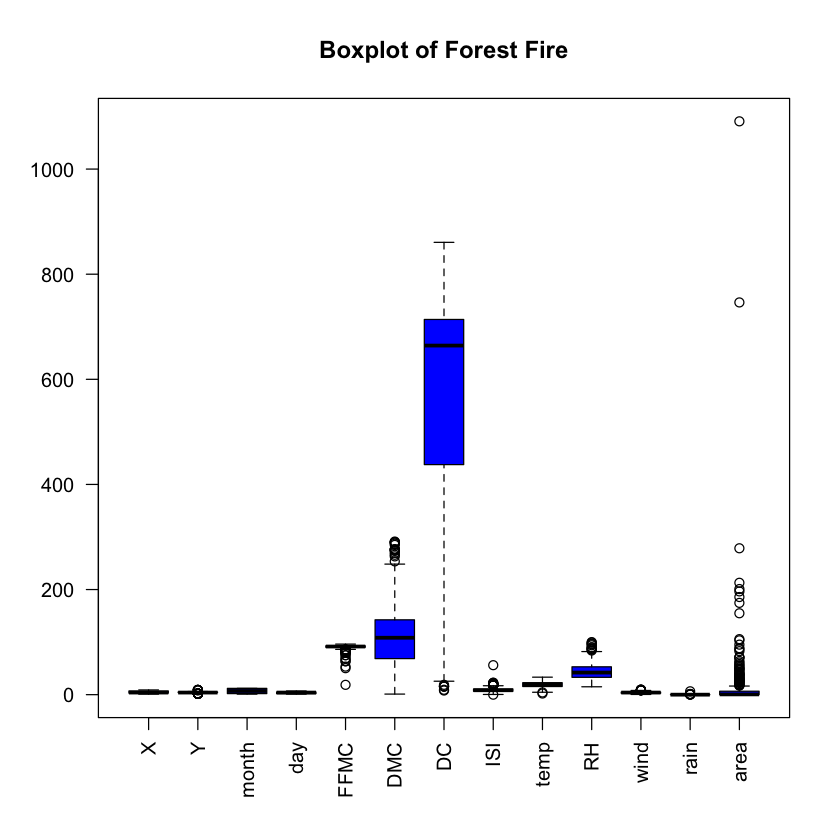

In [82]:
#To view all the lables on x-axis
par(las=2)
#plot the boxplot for all the attributes 
boxplot(forestFire, main='Boxplot of Forest Fire',col = 'blue')

The above boxplot illustrates all the attributes in the dataset. It is clear that the variables `FFMC`, `ISI`, and `area` have some potential outliers. However, most attributes are overshadowed by the `DC` attribute since it has the largest Interquartile Range. 

In the next part, in order to get a closer look, each attribute will be plotted in a single boxplot. 

`Side-by-Side Boxplots`

Drawing a side-by-side boxplot of each numerical variable. The individual box plots provide better representation of the variables. 

Using month, day as id variables


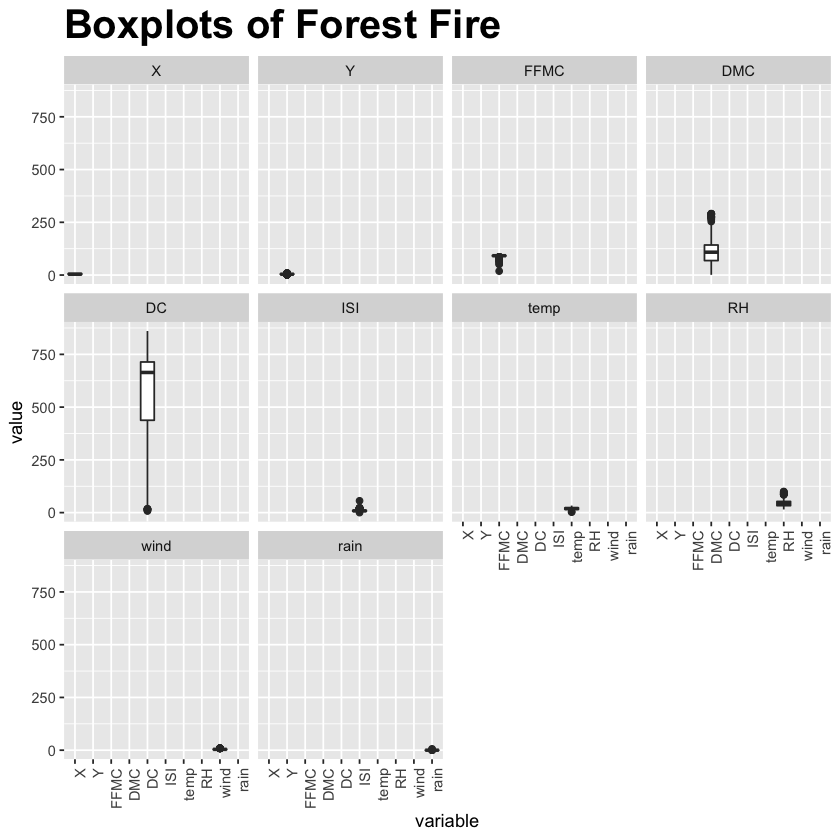

In [83]:
#prepare the data to be plotted
#melt all columns excluding the response variable area
meltedDF <- melt(as.data.frame(forestFire[,-13]))

#create the side by side boxplot using ggplot and facet_wrap
ggplot(meltedDF,aes(x = variable,y = value)) + 
  labs(title='Boxplots of Forest Fire',size=14)+
  facet_wrap(~variable) + 
  geom_boxplot()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        plot.title = element_text(size=24, face="bold"))

The side-by-side boxplots helps to compare the boxplots produced for each variable. The first two plots are for the values of the geographical location `X` and `Y`. These values represent the `X` and `Y` coordinates, both values are less than 10. The `DC` attribute shows a large Interquartile Range compared to the rest of the attributes. The last four plots  (`temp`,`RH`, `wind`, and `rain`) have smaller ranges compared to `DC`, thier values are less than 100. The variable `rain` seems to have alot of 0 values.    

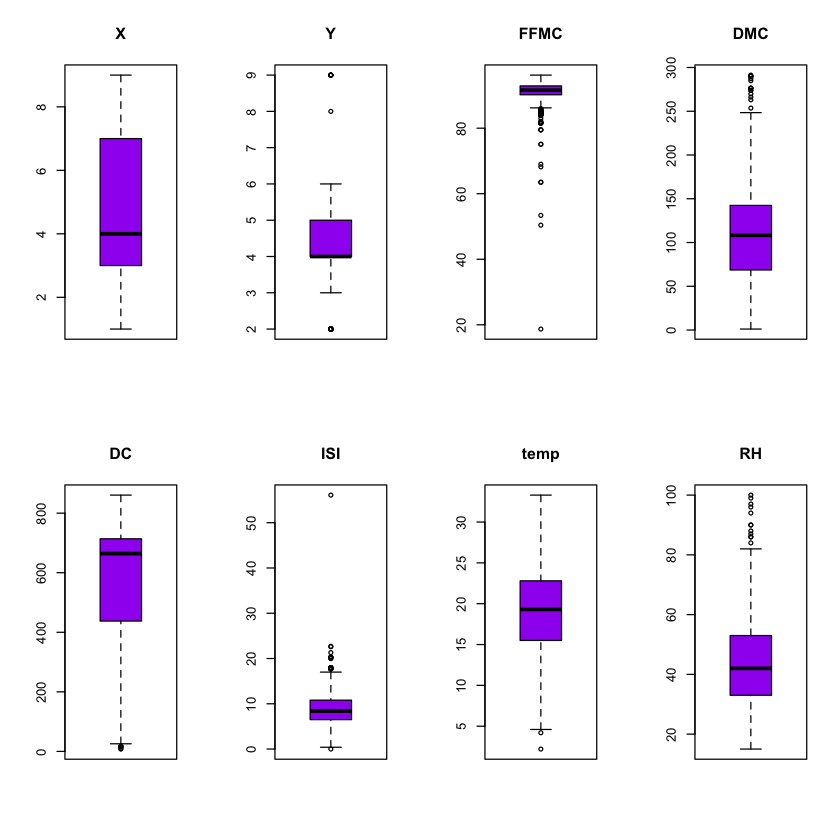

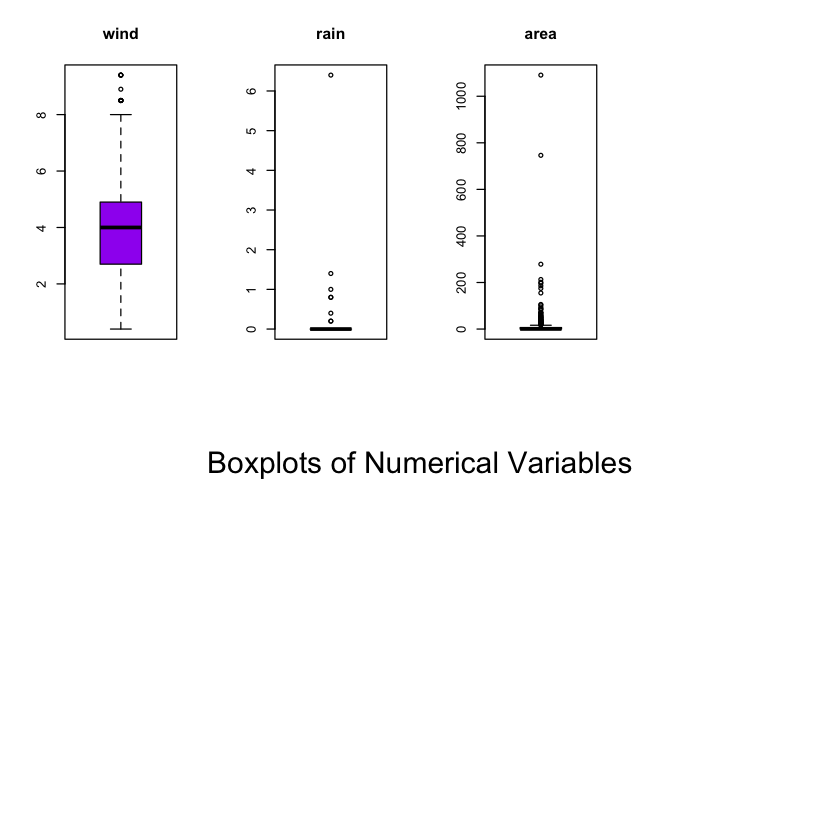

In [84]:
#create the plots layout 
par(mfrow = c(2,4)) 

#for loop to iterate through each column in the dataset 
#excluding variables of type factor and the response variable area
for (i in 1:(length(forestFire))){
    if(class(forestFire[[i]])!='factor') {
        boxplot(forestFire[,i], 
        main = names(forestFire[i]), 
        type="l", col = 'purple')}
}
#add title 
mtext("Boxplots of Numerical Variables", 
      outer = TRUE, line = -30,cex = 1.5)

The above boxplots illustrate the numerical variables of the dataset. Each boxplot has its own scale, which reflects each attribute more clearly. The attributes `X` and `Y` present the coordinantes, both of thier values are below 10. The attribute `FFMC` has possible outliers that lie below the lower hinge. While `ISI`, and `DMC` have some potintial outliers above the upper hing. The attribute `DC` has some outliers. The variables `rain`, and `area` have extreme outliers. The variable `temp` seem normal for now. 

### 2.2 Exploration of Individual Variables  <a class="anchor" id="sec_2.2"></a>

This part focuses on inspecting the attributes individually to get more in-depth insights of the data. 

#### 2.2.1 Statsitcal Exploration of Individual Variables  <a class="anchor" id="sec_2.2.1"></a>


This section contains two subsections, the first subsection performs statsitcal exploration on numerical variables.  The second subsection performs statsitcal exploration on categorical variables

#### 2.2.1.1 Statsitcal Exploration of  Individual Numerical Variables 

This section of statistcal exploration includes the following measures:
- Measures of Central Tendency:
    + Mean
    + Median
- Measures of spread:
    + Variance
    + Standard Deviation
    + Range
    + Quartiles

<u>Measures of Central Tendency<u/>

To explore the Central Tendence, this part will cover Mean and Median. Central tendency implies the tendency of the data points to cluster around its central or middle-most value. Mean is defined as the ‘central’ value of the given set of data points, whereas median is the ‘middle-most’ value in the given set of data points.

`Mean`

In [85]:
#Find the mean of each attribute then round the values
#sort the values in an ascending order
sort(round(sapply(forestFire[,5:13],mean),3))

rain    wind     ISI    area    temp      RH    FFMC     DMC      DC 
  0.022   4.018   9.022  12.847  18.889  44.288  90.645 110.872 547.940

The average `temp` in the dataset is around 18.89 degrees celsius. While the average `area` amounts to 12.85 hectar. Most of the data points of the attribute `DC` (Drought Code) are close to 547.94, which according to the `FWI guide` is an extreme hazard.

`Median`

In [86]:
#Find the median of each attribute then round the values
#sort the values in an ascending order
sort(round(sapply(forestFire[,5:13],median),3))

rain   area   wind    ISI   temp     RH   FFMC    DMC     DC 
  0.00   0.52   4.00   8.40  19.30  42.00  91.60 108.30 664.20

We can see that the middle value for `rain` is zero. While the middle value of `temp` is 19.3 degrees celsius. The highest middle value is found in the attribute `DC` which amounts to 664.2.

In general, median is more robust than mean. As mean is more sensitive to extreme values than median. 

<u>Measures of spread</u>

Measures of Spread is used to describe the variability in a set of data points. In this part, the exploration focuses on the measures of Spread. Such as: Variance, Standard Deviation, Range, Quartiles, and Interquartile Range.

`Variance`

Variance measures how spread the data points are. As a mesure of spread, Variance is considered weak. Normally, the main reason for calculating the variance is to find the Standard Deviation.

In [87]:
sort(round(apply(forestFire[,5:13], 2, var),3))

rain      wind       ISI      FFMC      temp        RH      area       DMC 
    0.088     3.210    20.789    30.472    33.717   266.260  4052.063  4101.952 
       DC 
61536.835

`Standard Deviation`

Standard Deviation is the measurement of average distance between each observation and the mean. A low standard deviation indicates that the observations tend to be close to the mean of the data set, while a high standard deviation indicates that the observations are spread out over a wider range of values. The standard deviation reflects the amount of change in the dataset.

In [88]:
#comparing the standard deviations of the attributes
sort(round(apply(forestFire[,5:13], 2, sd),3))

rain    wind     ISI    FFMC    temp      RH    area     DMC      DC 
  0.296   1.792   4.559   5.520   5.807  16.317  63.656  64.046 248.066

It can be noted that `rain` has the smallest standard deviation, the reason is `rain` has a mean close to zero. Additionally, it can be noted that `DC` has a large standard deviation. As explored in the previous part, `DC` has a wide range which means the observations are spread over a wide range of values. 

`Range`

In [89]:
#viewing the ranges of the numerical attributes 
Range<-sapply(forestFire[,5:13],range)
#create names for each row
row.names(Range)<-c('Minimum Value','Maximum Value')
#view the dataframe
Range

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
Minimum Value,18.7,1.1,7.9,0.0,2.2,15,0.4,0.0,0.00
Maximum Value,96.2,291.3,860.6,56.1,33.3,100,9.4,6.4,1090.84


The table shows that the attributes: `DMC`, `DC`, and `area` have large ranges. 

`Quartiles`

Quartiles are values that divide the dataset into quarters.
In this part, we will explore the quartiles as well as the Interquartile Range.

In [90]:
#creating Boxplot elements for the numerical attributes using fivenum() function 
fivenumForest<-sapply(forestFire[,5:13],fivenum)
#creating row names to distinguesh the rows
row.names(fivenumForest)<-c('minimum', 'lower-hinge',
                            'median', 'upper-hinge', 'maximum')
#view the dataframe
fivenumForest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
minimum,18.7,1.1,7.9,0.0,2.2,15,0.4,0.0,0.00
lower-hinge,90.2,68.6,437.7,6.5,15.5,33,2.7,0.0,0.00
median,91.6,108.3,664.2,8.4,19.3,42,4.0,0.0,0.52
upper-hinge,92.9,142.4,713.9,10.8,22.8,53,4.9,0.0,6.57
maximum,96.2,291.3,860.6,56.1,33.3,100,9.4,6.4,1090.84


The values of `area` show a high concentration between 0 and 7, with a high maximum value above 1000. This is a strong indication of outliers. The same pattern is found in `rain`, with the majority of values clustering around 0 and a maximum value of 6.4.

In [91]:
#returns the same output with the corresponding Quarter percentage 
sapply(forestFire[,5:13],quantile)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0%,18.7,1.1,7.9,0.0,2.2,15,0.4,0.0,0.00
25%,90.2,68.6,437.7,6.5,15.5,33,2.7,0.0,0.00
50%,91.6,108.3,664.2,8.4,19.3,42,4.0,0.0,0.52
75%,92.9,142.4,713.9,10.8,22.8,53,4.9,0.0,6.57
100%,96.2,291.3,860.6,56.1,33.3,100,9.4,6.4,1090.84


<u>Quantiles description:</u>

- <b>The zero quartile</b> which is the smallest quantile, it represents the smallest value of each attribute. The table shows that `ISI` attribute has recorded 0 as its smallest value.   
- <b>The first quartile</b> is defined as the middle number between the smallest number and the median of the data set. The rank of the first quartile is 25%, at which approximately quarter of the values are less than the value of the first quartile. For instance, in `FFMC` attribute quarter of the data points are less than 90.2.

- <b>The second quartile</b> is the median, where 50% of the data lies below this point. For instance, in `area` attribute half of the data points are less than 0.52.

- <b>The third quartile</b> is the middle value between the median and the highest value of the data set.The rank of the third quartile is 75%, at which approximately three quarters of the data points are less than the value of the third quartile. For example, in `temp` attribute three quarters of the values in this attribute are less than 22.8.

- <b>The fourth quartile</b> ranked 100%, contains the maximum value in the given observations. For instance, in `area` attribute the maximum value is 1090.84.

In [92]:
#view the sorted Interquartile Range for each numerical attribute
IQR<-t(data.frame(sort(sapply(forestFire[,5:13],IQR))))
#create a name for the row
row.names(IQR)<-('IQR')
#diaplay the data frame
IQR

,rain,wind,FFMC,ISI,area,temp,RH,DMC,DC
IQR,0,2.2,2.7,4.3,6.57,7.3,20,73.8,276.2


The Interquartile Range is a measure of variability, being equal to the distance between the upper and lower quartile.

It can be seen that `DC` has the largest `IQR` value as the datapoints are spread over a wide range. On the other hand, `rain` has the smallest `IQR` values. This is due to the values of `rain` clustering around zero.

#### 2.2.1.2 Statsitcal Exploration of Individual Categorical Variables

This part explores the statsitcs of the two categorical variables: `month` and `day`. The exploration of the two variables is performed using frequency tables.

`month` 

In [93]:
#to view the number of fires per month 
monthTable<-sort(table(forestFire$month))
monthTable


nov jan may apr dec oct jun feb jul mar sep aug 
  1   2   2   9   9  15  17  20  32  54 172 184 

In [94]:
#to view the precentage of fires per month
round(prop.table(monthTable),3)*100


 nov  jan  may  apr  dec  oct  jun  feb  jul  mar  sep  aug 
 0.2  0.4  0.4  1.7  1.7  2.9  3.3  3.9  6.2 10.4 33.3 35.6 

The table returns the number of fire incidents per `month` sorted from smallest to largest. September and August have recorded the highest number of fires with 172, and 184 fires respectively. The lowest number of fires was recorded in November with only one fire. 

As for the recorded percentages, alomst 70% of the fires occured in September and August. 

`day`

In [95]:
#to view the number of fires per day 
dayTable<-sort(table(forestFire$day))
dayTable


wed thu tue mon sat fri sun 
 54  61  64  74  84  85  95 

In [96]:
#to view the precentage of fires per month
round(prop.table(dayTable),3)*100


 wed  thu  tue  mon  sat  fri  sun 
10.4 11.8 12.4 14.3 16.2 16.4 18.4 

The table returns the number of fire incidents per `day` sorted from smallest to largest. Saturday, Friday, and Sunday have recorded the highest number of fires with more than 80 fires per day. This is an indication that the number of fires increases during the weekend. The lowest number of fires was recorded on Wedensday with 54 fires a day. 

As for the recorded percentages, alomst 50% of the fires occured during weekends.

#### 2.2.2 Graphical Exploration of Individual Variables <a class="anchor" id="sec_2.2.2"></a>


This section seeks to find patterns in the data by using graphical representation. The section consists of two subsections, the first subsection performs graphical exploration on numerical variables.  The second subsection performs graphical exploration on categorical variables

#### 2.2.2.1 Graphical Exploration of Individual Numerical Variables

The graphical exploration is performed by producing plots of the numerical attributes. The plots used to illustrate the attributes are:
- Boxplots
- Histograms

`Boxplot`

The function <b>boxplot.stats()</b> is used to collect the statistics required for generating box plots. 

The below code uses the function <b>boxplot.stats()</b> to explore the attribute `area` more closely.

In [97]:
#view the for the respopnse variable area
boxplot.stats(forestFire$area)

$stats
[1]  0.00  0.00  0.52  6.57 16.40

$n
[1] 517

$conf
[1] 0.06346173 0.97653827

$out
 [1]   17.20   19.23   23.41   24.23   26.00   26.13   27.35   28.66   28.66
[10]   29.48   30.32   31.72   31.86   32.07   35.88   36.85   37.02   37.71
[19]   48.55   49.37   58.30   64.10   71.30   88.49   95.18  103.39  105.66
[28]  154.88  196.48  200.94  212.88 1090.84   17.85   22.03   24.77   24.24
[37]   86.45   34.36   56.04   28.19   20.03   18.30   39.35  174.63   42.87
[46]   24.59   28.74   30.18   70.76   51.78  746.28  185.76   82.75   61.13
[55]   38.48   70.32  278.53   26.43   46.70   43.32   40.54   49.59   54.29

<u>Comments on boxplot.stats:</u>
- <b>Stats</b>: This function returns a vector of length 5, containing the extreme of the lower whisker, the lower ‘hinge’, the median, the upper ‘hinge’ and the extreme of the upper whisker. The four values match the values returned by quantile() function(0%,25%,50%, and 75%). While the last value presents the exteme of the upper whisker. This value amounts to 16.4 and it is the maxmium value in the attribute that is not considered an outlier. 
- <b>n</b>: The total number of observations in the area coloumn with a value of 517. 
- <b>conf</b>: The confidence interval of the median, the lower and upper values. It can be seen that the confidence interval of `area` is almost [0.063,0.977]
- <b>out</b>: The values of any data points which lie beyond the extremes of the whiskers. The out function returns the potential outliers. 

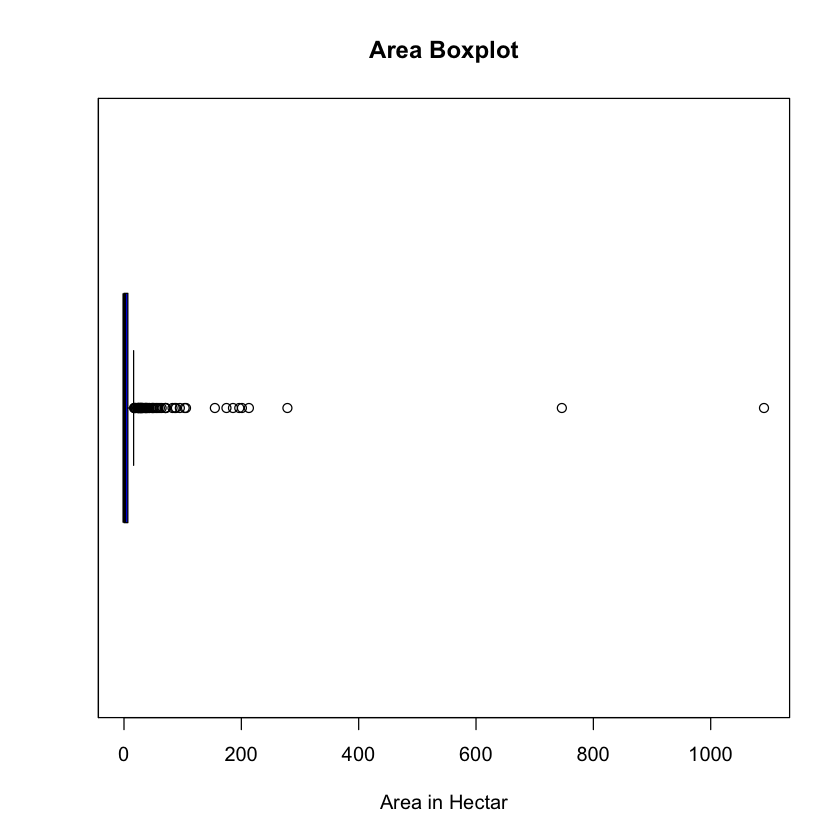

In [98]:
#plot a boxplot of the response variable area 
boxplot(forestFire$area,col='blue',
        main='Area Boxplot',xlab='Area in Hectar',
        yaxt = "n", horizontal=TRUE)
#change the sequence of value on y-axisb
axis(2, at = seq(0, 1000, 100), las = 2)

The boxplot of `area` shows that most of the data points cluster between zero and 200. The majority of the data points are under 100. In addition, it can be noted that `area` has some high outliers. 

`Histogram`

The shape of the distribution of each variable can be investigated by plotting a histogram.

Using month, day as id variables
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


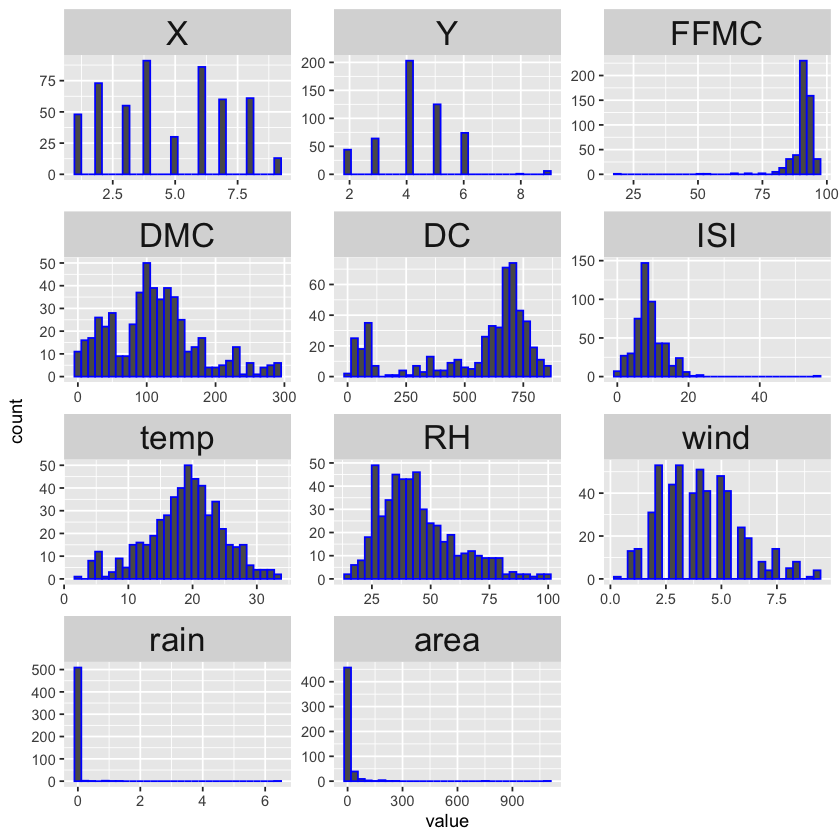

In [99]:
#melt the dataset to change the form from wide to long 
#use geom_histogram to plot histograms 
#use facet_wrap to plot the variables side by side 

ggplot(melt(forestFire),aes(x=value)) + 
geom_histogram(col='blue') + 
facet_wrap(~variable,ncol=3, scales = "free")+
theme(strip.text = element_text(size=20))

The above histograms show different level of skewness for each attribute. Some of the attributes are highly skewed to the right such as: `rain` and `area`. While some vriables skewed to the left such as `FFMC`. On the other hand, `temp` seems to follow a normal distribution. 

**Histograms of the weather inputs (temp, RH, wind, and rain)**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


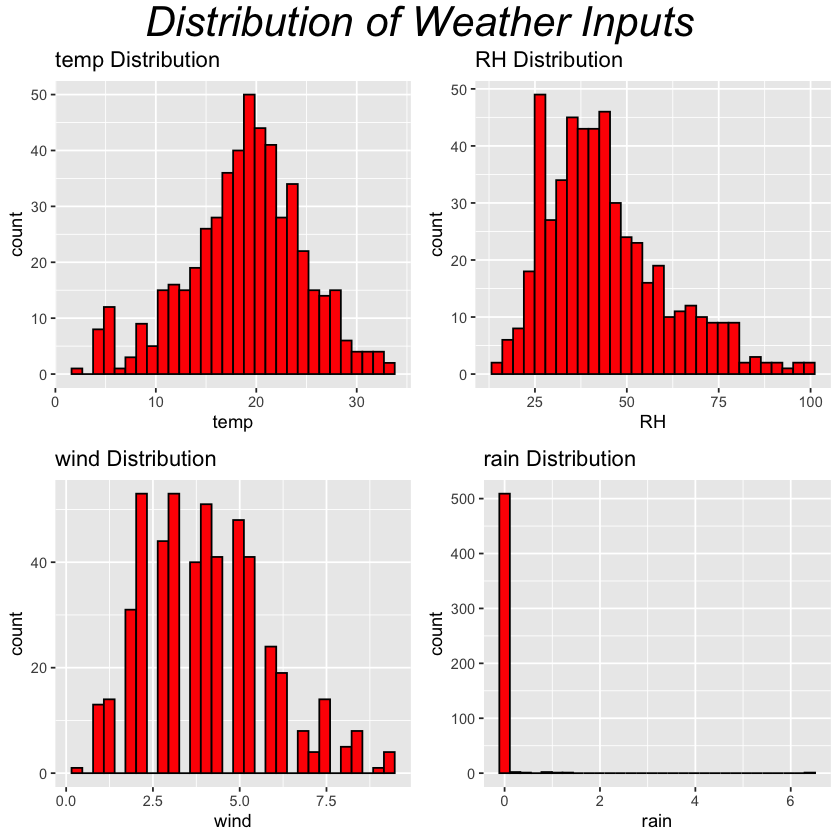

In [100]:
#temp histogram
p1<-ggplot(aes(x=temp), data = forestFire) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('temp Distribution')

#RH histogram
p2<-ggplot(aes(x=RH), data = forestFire) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('RH Distribution')

#wind histogram
p3<-ggplot(aes(x=wind), data = forestFire) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('wind Distribution')

#rain histogram
p4<-ggplot(aes(x=rain), data = forestFire) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('rain Distribution')



#arrange the plots
grid.arrange(p1, p2, p3, p4, ncol = 2,
             top = textGrob("Distribution of Weather Inputs",
                            gp=gpar(fontsize=25,font=3)))

The following observations are obtained from the above plots.
- The variable `temp` seems to illustrate a normal distribution. As well as `RH` variable. 
- The distribution of the variable `wind` has a distribution close to a normal distribution. 
- The variabl `rain` is highly skewed to the right. It has one peak which meakse it a unimodal. Alot of data points seem to cluser around zero.  

**Histograms of the FWI Components  (FFMC,DMC,DC, and ISI)**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


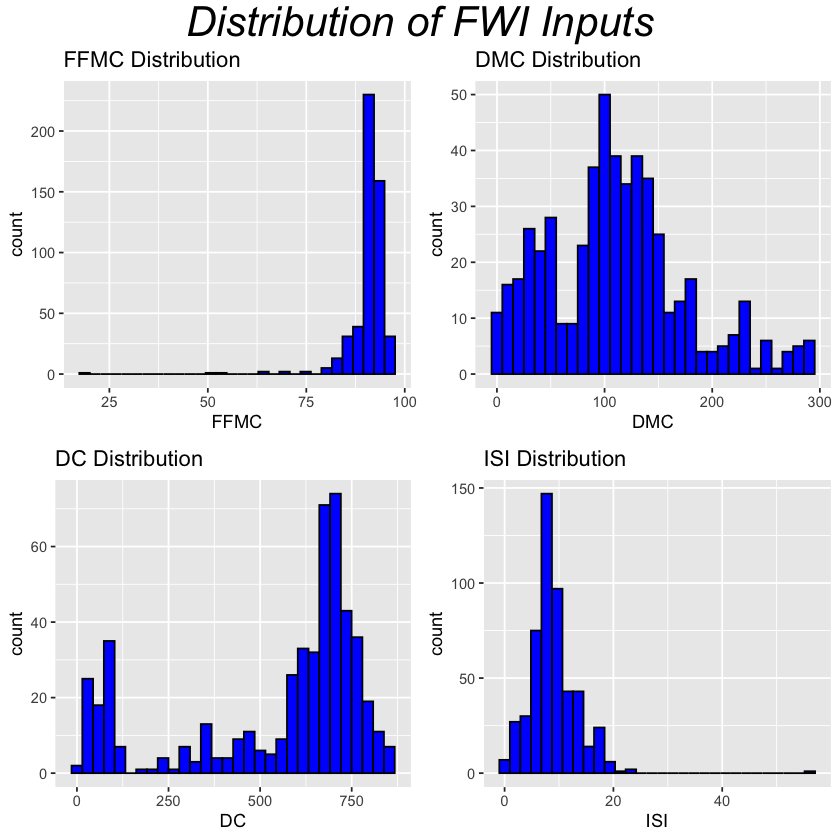

In [101]:
#FFMC histogram
p1<-ggplot(aes(x=FFMC), data = forestFire) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('FFMC Distribution')

#DMC histogram
p2<-ggplot(aes(x=DMC), data = forestFire) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('DMC Distribution')

#DC histogram
p3<-ggplot(aes(x=DC), data = forestFire) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('DC Distribution')

#ISI histogram
p4<-ggplot(aes(x=ISI), data = forestFire) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('ISI Distribution')

#arrange the plots
grid.arrange(p1, p2, p3, p4, ncol = 2,
             top = textGrob("Distribution of FWI Inputs",
                            gp=gpar(fontsize=25,font=3)))

The following observations are obtained from the above plot.
- The variable `FFMC` displays a distribution that is highly skewed to the left, with one peak which makes it unimodal. 
- The `DMC` variable show a bimodal pattern with multiple peaks. Most of the values cluster around 100. 
- The `DC` attribute shows a distribution similar to normal distribution with a skewe to the left. //
- The `ISI` variable displays a unimodal distribution with a skwew to the right. 

**Histogram of the respons variable `area`**

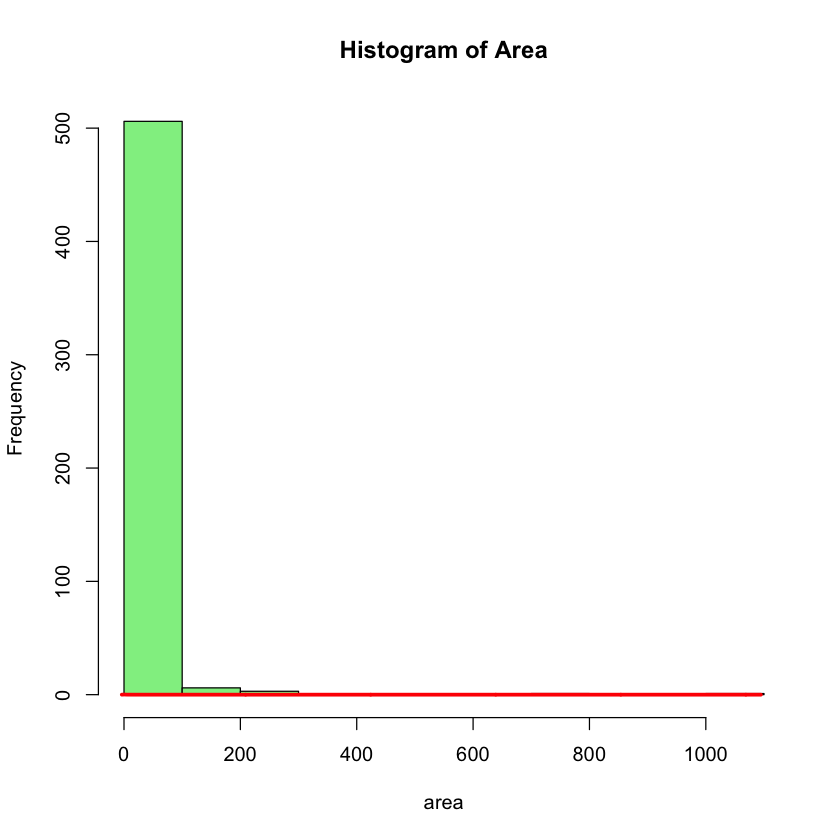

In [102]:
hist(forestFire$area,col='light green',xlab='area',
     main='Histogram of Area')
lines(density(forestFire$area), col = "red", lwd = 3)

The above histogram illustrates that the data points of the response variable `area` highly skewed to the right. It can be seen that all the data points are strictly positive. The majority of the data points cluster between 0 and 200 while most of the data points are under 100. In terms of Modality, the histogram shows a Unimodal shape with a single peak. 

#### Transformation of The Response Variable Area 

Based on these findings, the log transformation can be used as a treatment of the highly skewed values. A new attribute can be added to the dataframe to hold the values of the transformed values of `area`.

In [103]:
#create a new column logarea to hold the values of the log transformation of area
forestFire$logarea=ifelse(forestFire$area>0,
                          log(forestFire$area),NA)

In [104]:
#view a subset of the dataframe 
tail(forestFire[,c('area','logarea')])

,area,logarea
512,0.00,NA
513,6.44,1.862529
514,54.29,3.994340
515,11.16,2.412336
516,0.00,NA
517,0.00,NA


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 247 rows containing non-finite values (stat_bin).”

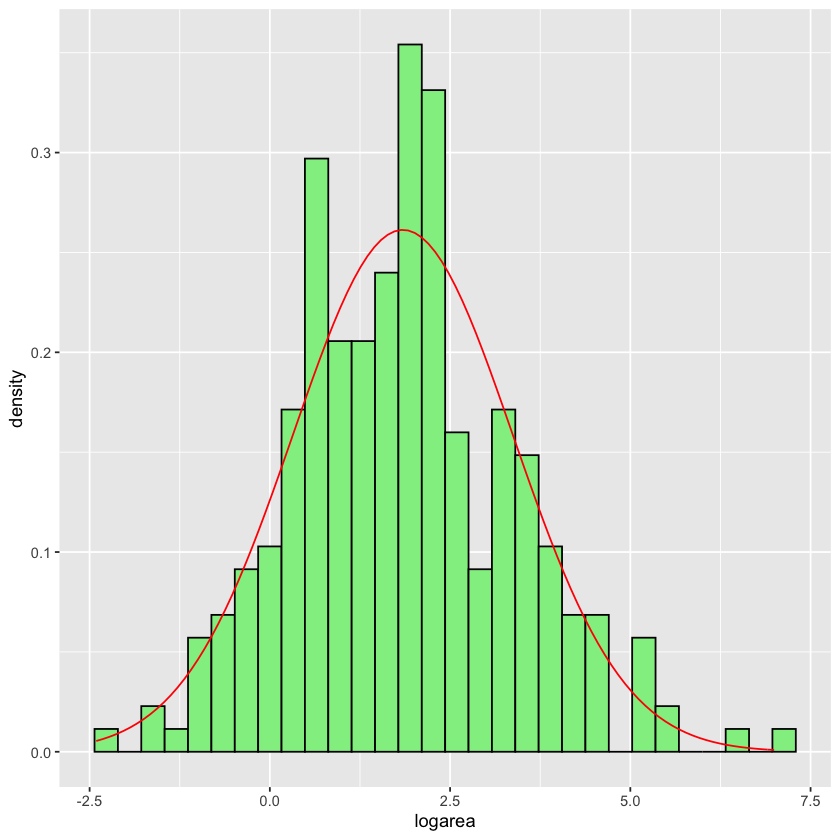

In [105]:
ggplot(forestFire, aes(x=logarea))+
geom_histogram(aes(y=..density..),colour='black', 
               fill='light green')+
stat_function(fun=dnorm, 
              args=list(mean=mean(forestFire$logarea,na.rm=TRUE),
              sd=sd(forestFire$logarea,na.rm=TRUE)),col='red')

After the log transformation, the response value `area` seems to follow a normal distrbution.

#### 2.2.2.2  Graphical Exploration of Individual Categorical Variables 

This part explores the patterns in the categorical variables by generating plots. 

As the number of levels is high,12 months for `month` and 7 days for `day`, the pie chart will not reflect a clear pattern. Hence, the graphical representation uses bar charts to describe the categorical attributes `month` and `day`.

`Bar Chart`

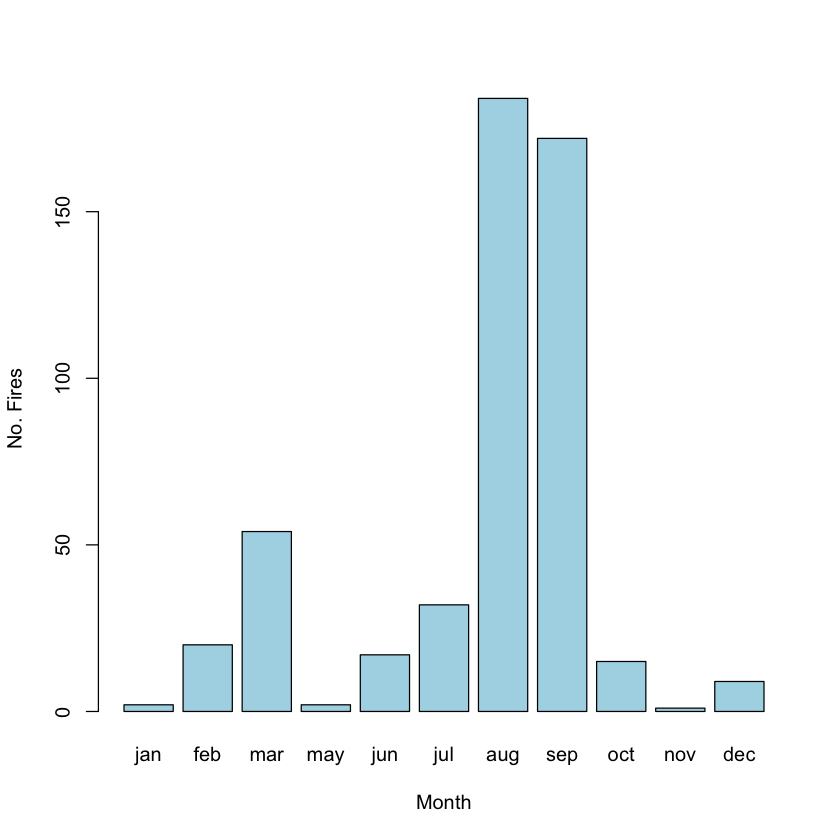

In [106]:
#create a vector to store the value of the sorted months
monthSorted  = factor(forestFire$month, 
                      levels=c("jan","feb","mar","may","jun","jul",
                                "aug","sep","oct","nov","dec"))

#bar plot of the sorted months 
#indicating the number of fires each month 
barplot(table(monthSorted),col="light blue",
        xlab="Month",ylab="No. Fires")

The bar plot illustrates the number of fires recorded on each month. The highest number of fires was recorded in August and September, followed by March and July receptively.

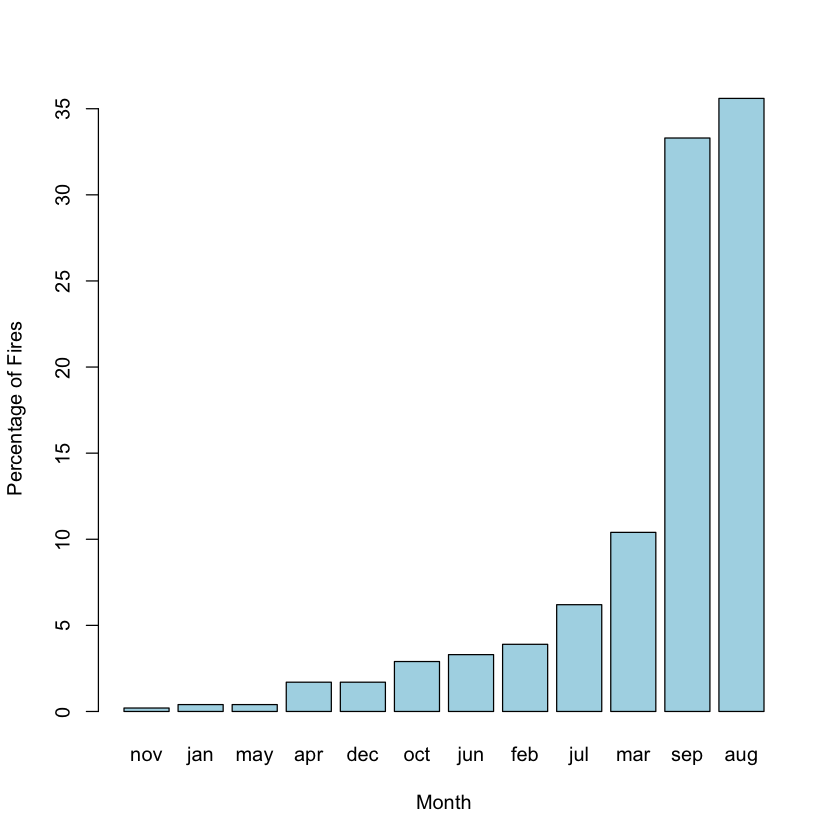

In [107]:
#count per month in percentage 
monthPercent<-round(prop.table(monthTable),3)*100

#plot a bar plot of the sorted months 
#indicating the number of fires each month 
barplot(monthPercent,col="light blue",
        xlab="Month",ylab="Percentage of Fires")

The bar plot illustrates the precentage of the number of fires recorded on each `month`. The highest number of fires was recorded in August and September with around 35% , followed by March and July receptively.

`day`

`Bar Chart`

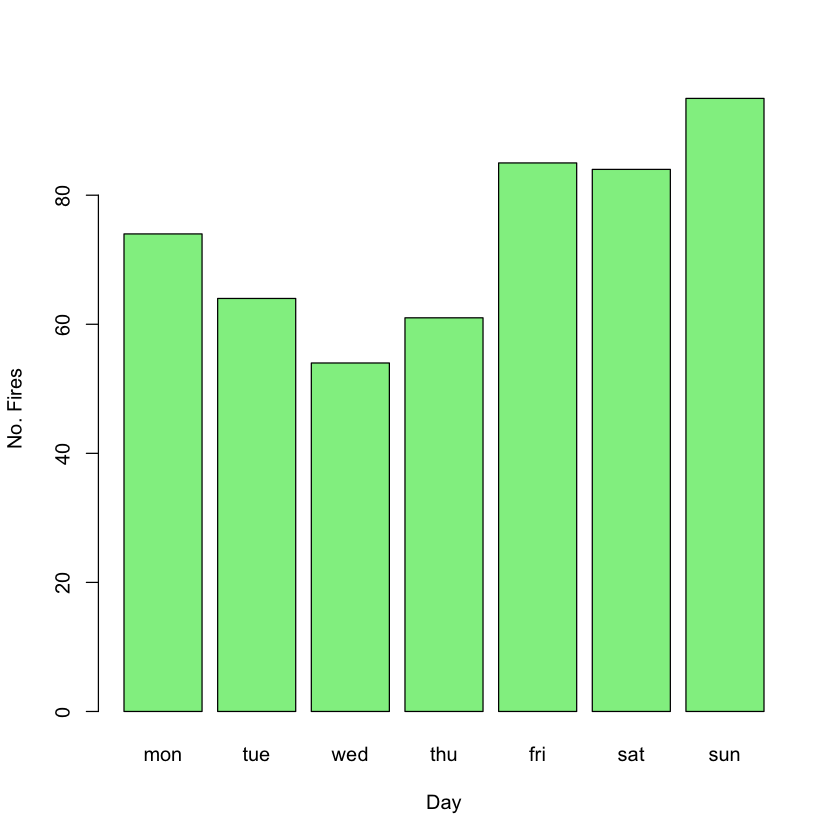

In [108]:
#create a vector to store the value of the sorted days
daySorted  = factor(forestFire$day, 
            levels=c("mon","tue","wed","thu","fri","sat","sun"))


#plot a bar plot of the sorted months 
#indicating the number of fires each month 
barplot(table(daySorted),col="light green",
        xlab="Day",ylab="No. Fires")

The bar plot illustrates the number of fires recorded on each `day`. The highest number of fires was recorded Friday,Saturday and Sunday, followed by Monday.

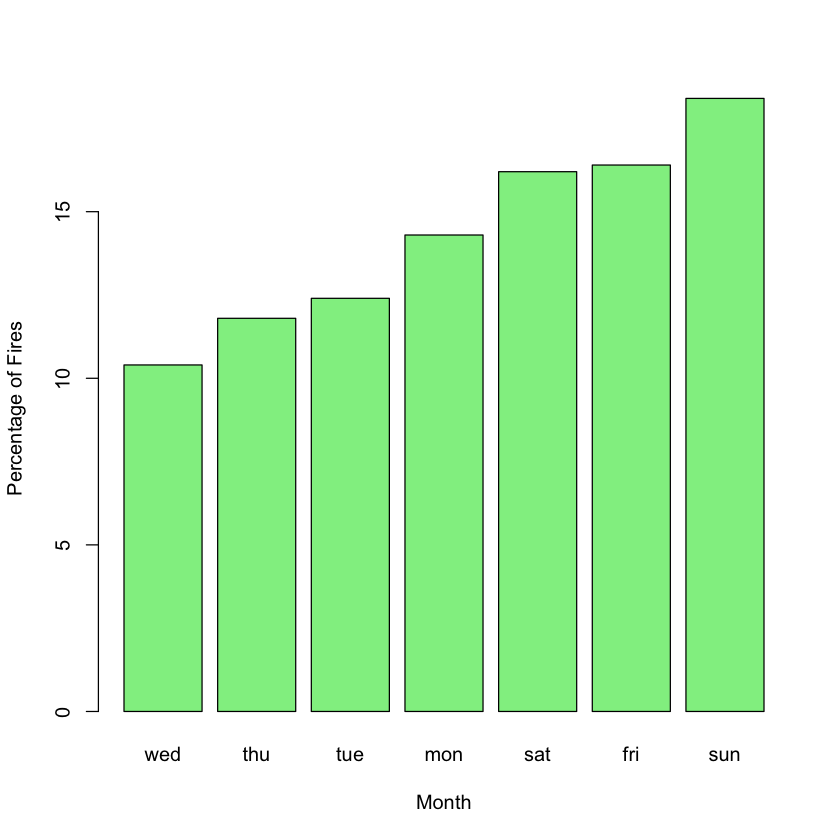

In [109]:
#count per month in percentage 
dayPercent<-round(prop.table(dayTable),3)*100


#plot a bar plot of the sorted months indicating the number of fires each month 
barplot(dayPercent,col="light green",
        xlab="Month",ylab="Percentage of Fires")

The bar plot illustrates the precentage of the number of fires recorded on each `day`. The highest percentage was recorded on Friday,Saturday and Sunday, followed by Monday. With more than 14% of fires occuring on these days. 

### 2.3 Correlation (Association Between Variables)   <a class="anchor" id="sec_2.3"></a>

This purpose of this part is to investigate the interrelationship between the variables, as well as the relationships between the variables and the response variable `area`. Understanding the strength and direction of these relationships is helpful in <u>features selection</u> and <u>model building</u> in coming parts. 

#### 2.3.1 Correlation Between Numerical Variables  <a class="anchor" id="sec_2.3.1"></a>


This section explores the possible associations between numerical variables by implementing statsictal metrics such as: 
- Correlation
- Covariance 

Covariance and Correlation are both measures of the relationship and the dependency between two variables. Covariance indicates the direction of the linear relationship between variables. On the other hand, Correlation measures both the strength and direction of the linear relationship between two variables.

`Correlation`

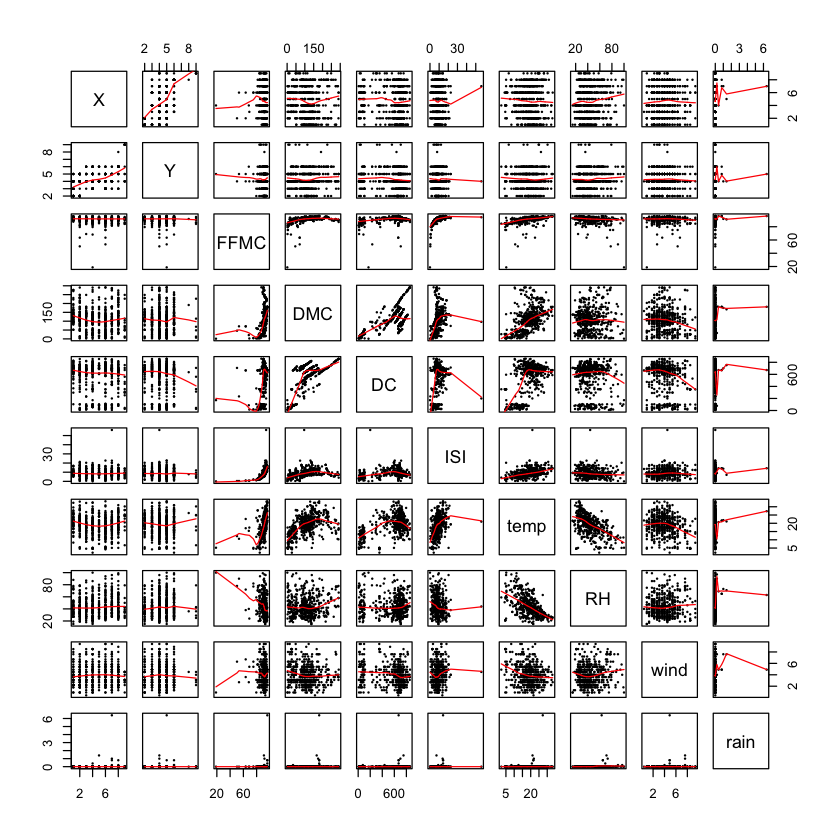

In [110]:
pairs(forestFire[,c(1,2,seq(5,12))],panel = panel.smooth,cex=0.2)

The above plots illustrates the interrelationships between the predictors. The below comments describe the intital findings:

- The geographical location attributes `X` and `Y` seem to have a positive correlation.
- The graphs reflect a positive correlation between `temp` and `FFMC`, `DMC`, `DC`, and `ISI`. 
- There is a negative correlation between `temp` and `RH`. 
- The attribute `FFMC` seems to have a positive correlation with `ISI`. 
- The attribute `wind` deos not seem to have a strong relationship with any of the attributes. The same observation applies to the attribute `rain`

#### Correlation Matrix

The correlation matrix provides a numerical representaion of the correlation rates between each two variables in the dataset. The attribute `logarea` and the categorical columns `month` and `day` are excluded. 

In [111]:
#fint the correlation and round the number 
corMatrix<-round(cor(forestFire[,-c(3,4,14)]),3)
corMatrix

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000,0.540,-0.021,-0.048,-0.086,0.006,-0.051,0.085,0.019,0.065,0.063
Y,0.540,1.000,-0.046,0.008,-0.101,-0.024,-0.024,0.062,-0.020,0.033,0.045
FFMC,-0.021,-0.046,1.000,0.383,0.331,0.532,0.432,-0.301,-0.028,0.057,0.040
DMC,-0.048,0.008,0.383,1.000,0.682,0.305,0.470,0.074,-0.105,0.075,0.073
DC,-0.086,-0.101,0.331,0.682,1.000,0.229,0.496,-0.039,-0.203,0.036,0.049
ISI,0.006,-0.024,0.532,0.305,0.229,1.000,0.394,-0.133,0.107,0.068,0.008
temp,-0.051,-0.024,0.432,0.470,0.496,0.394,1.000,-0.527,-0.227,0.069,0.098
RH,0.085,0.062,-0.301,0.074,-0.039,-0.133,-0.527,1.000,0.069,0.100,-0.076
wind,0.019,-0.020,-0.028,-0.105,-0.203,0.107,-0.227,0.069,1.000,0.061,0.012
rain,0.065,0.033,0.057,0.075,0.036,0.068,0.069,0.100,0.061,1.000,-0.007


#### Visualization of the correlatoin matrix

The below plot it the graphical illustration of the previous correlation matrix. The plot displays the correlation rates coded by colours. The green indicates a relativly strong positive correlation rate that ranges from 0.33 to 1. The yellow reflects a moderate positive or negative correlation rate that ranges from -0.33 to 0.33. The red indicates a strong negative correlation rate that ranges from -1 to -0.33.

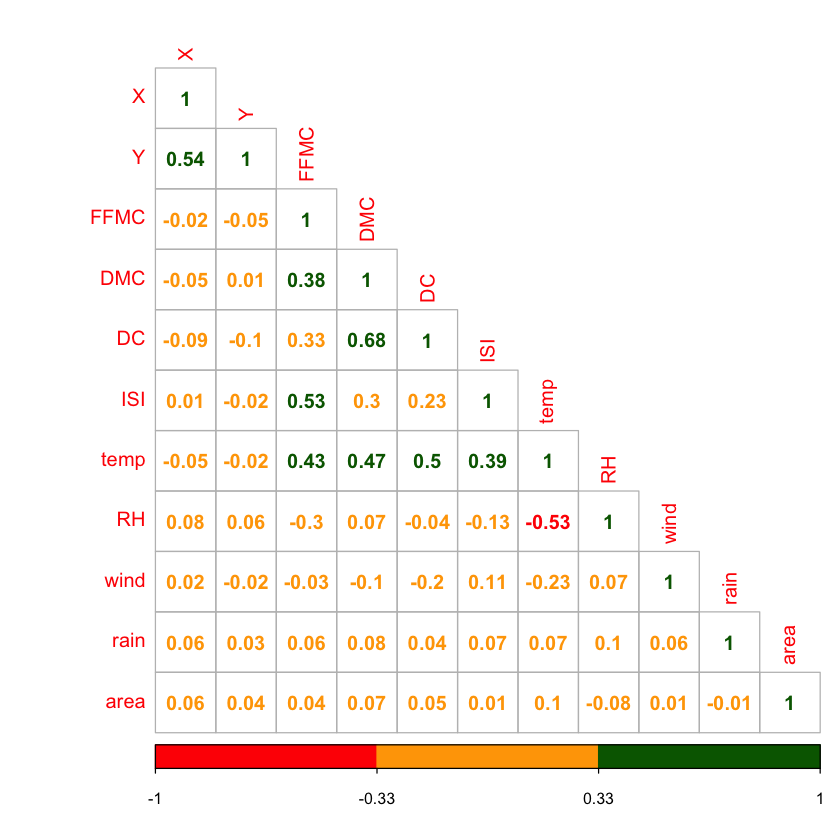

In [112]:
corrplot(corMatrix,method='number',
         col=c("red", "orange",'dark green'),type='lower')

<b> The predictors coreelation with the respons variable:</b>
- The correlation matrix shows a positive correlation of the gepgraphical location indicators `X` and `Y` with the response variable `area`.
- The correlation matrix shows that `temp` vairable scored the highest positive correlation rate with the response variable `area` with almost 0.1 correlation rate.

- The second highest positive correlation rate with the respons variable was in `DMC`. The correlation rate amounted to 0.07. 
- The lowest negative correlation rates with the response variable `area` were recorded by `RH` and `rain` with rates of -0.08 and -0.01 respectively. 

<b>In terms of the correlation between the predictors:</b>

- The predictor `temp` is postively correlated with the FWI variables (`FFMC`,`DMC`,`DC`, and `ISI`). On the other hand, `temp` scored a negative correlation with `RH`. In fact, the highest negative correlation was recorded for the correlation between `temp` and `RH` with a rate of -0.53. `Temp` and `RH` are egatively linearly related which means that as the temprature increases, the outside humidity RH decreases.    


- The highest positive correlation between two predictors was recorded between `DMC` and `DC` with a rate of 0.68. This shows that the increment in the Duff Moisture Code (DMC) results in the increment of the Drought Code (DC). Both measure relate to the average moisture content which explains the high correlation between them. Additionally, `DMC` is positvely correlated with `FFMC` and `temp`.    


- According to FWI system, the Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It combines the effects of wind and the FFMC on rate of spread. The correlation matrix returns a relatively high positive correlation between `ISI` and `FFMC` with 0.53 rate. However, the matrix shows a weak positive correlation between `wind` and `ISI` with a rate of 0.11.    


- The `FFMC` predictor is postively correlated with most of the predictors except for `wind` and `RH`.

**Graphical representaion of the correlation matrix**

Another method to show the correlation rates. The darker and bigger the circle, the stronger the correlation.

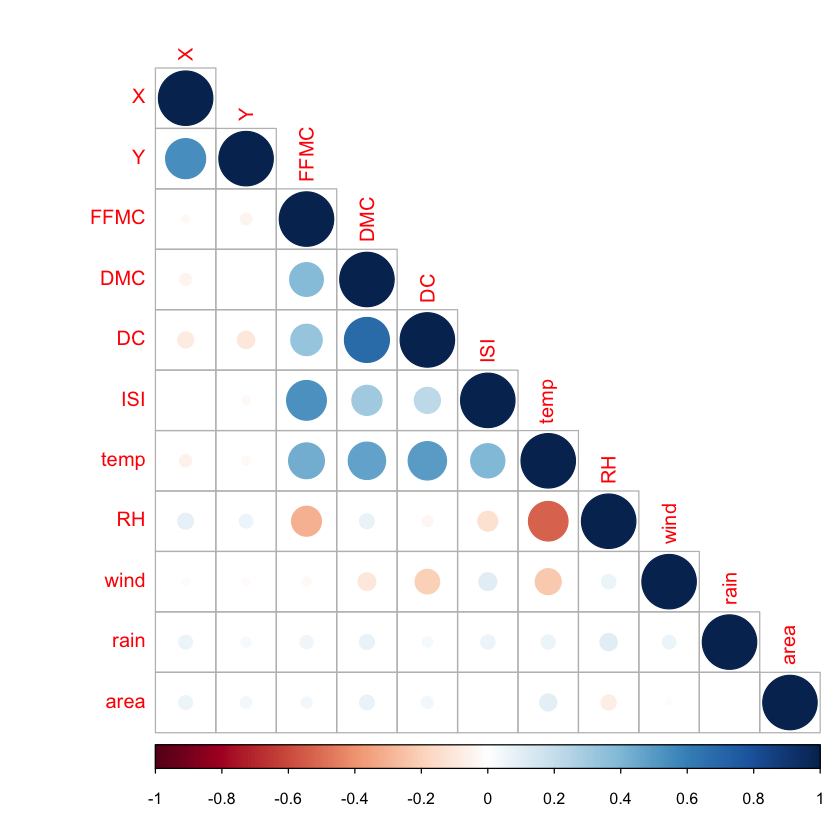

In [113]:
corrplot(corMatrix,method='circle', type='lower')

It can be seen that the strong positive correlation such as `temp` with `FFMC`, `DMC`, `DC` and `ISI` are indicated by a medium blue point. While the negative correlation between `temp` and `RH` is indicated by a medium brown point.

**Scatter Plots and Correlation Rates**

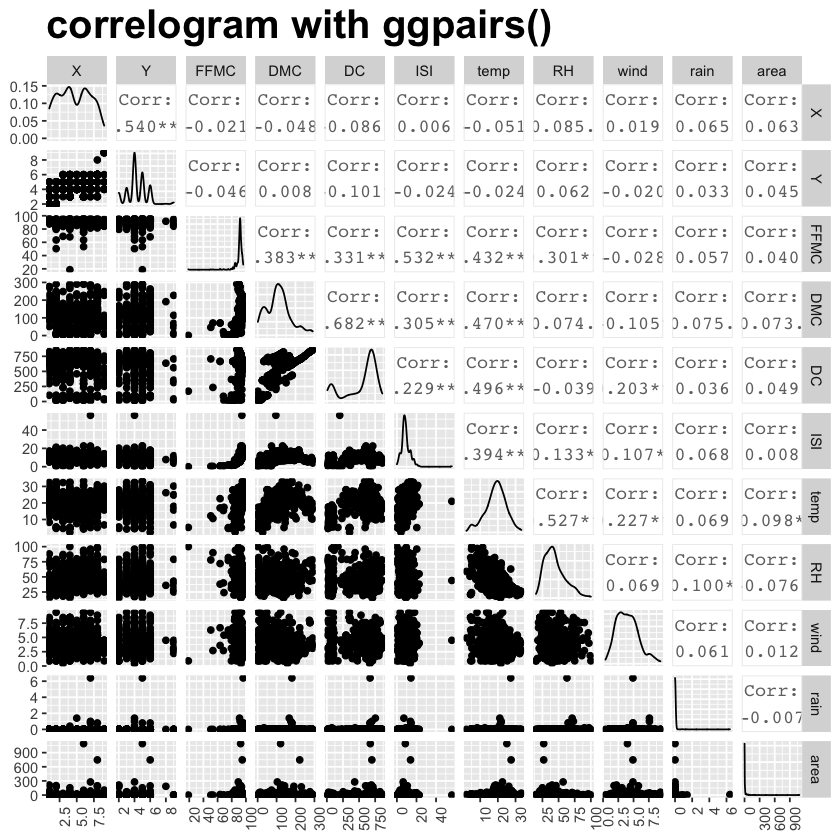

In [114]:
ggpairs(forestFire[,-c(3,4,14)],
        title="correlogram with ggpairs()") +
theme(axis.text.x = element_text(angle = 90, hjust = 1),
        plot.title = element_text(size=24, face="bold"))

Scatterplots of each pair of numeric variable are drawn on the left part of the figure. The correlation ratio is shown on the right.   
- The correlation rate between `DMC` and `DC` is a positive corrlation of 0.682. This is reflected in the scatterplot of `DMC` and `DC` as it illustrates a positive linear relationship between the two variables. 
- On the other hand, the scatter plot of `rain` and `RH` shows a negative linear relationship between the two variables. Which is reflected in the correlation rate of   -0.527.
- `area` and `wind` are weakly related, with a correlation rate close to zero (0.0123). The weak relationship is illustrated in the scatter plot where there is no pattern of correlation.  

#### Correlation of the FWI predictors. 

In [115]:
#create vector that contains the column names 
fwiVarLst <- c("FFMC","DMC","DC","ISI")
#use the vector to create a subset of the original dataset 
fwiVar <- forestFire[fwiVarLst]
#find the correlation
cor(fwiVar)

,FFMC,DMC,DC,ISI
FFMC,1.0000000,0.3826188,0.3305118,0.5318049
DMC,0.3826188,1.0000000,0.6821916,0.3051278
DC,0.3305118,0.6821916,1.0000000,0.2291542
ISI,0.5318049,0.3051278,0.2291542,1.0000000


The FWI variables seem to be positvely correlated. Although, some variables seem more correlated than others. For instance, `DC` and `DMC` are positvely linearly related with a correlation rate of 0.68. However, `DC` and `ISI` have a weak linear relationship with a rate close to zero.

#### Correlation of the weather indicators.

In [116]:
#create vector that contains the column names 
weatherVarLst <- c("RH","temp","wind","rain")
#use the vector to create a subset of the original dataset 
weatherVar <- forestFire[weatherVarLst]
#find the correlation
cor(weatherVar)

,RH,temp,wind,rain
RH,1.00000000,-0.52739034,0.06941007,0.09975122
temp,-0.52739034,1.00000000,-0.22711622,0.06949055
wind,0.06941007,-0.22711622,1.00000000,0.06111888
rain,0.09975122,0.06949055,0.06111888,1.00000000


In general, the weather indicators seem to have a weak linear relationship. In fact, some predictors have a negative linear relationship. Such as: `temp` and `RH` which scored the highest negative correlation rate of -0.52. Additionally, `rain` and `RH` seem to have a weak linear relationship with a rate of 0.099.

`Covariance`

Since the attribute `temp` scored the higest correlatoin rate with `area`. A further exploration can be performed to find the covariance between the two variables.

In [117]:
cov(forestFire$area,forestFire$temp)

[1] 36.16568

In [118]:
cov(forestFire$area,forestFire$rain)

[1] -0.1387668

The covariance indicates a positive relationship between the predictor `temp` and the response variable `area`. It indicates that the higher the temprature, the bigger the burned area is. On the other hand, the covariance indicates a negative relationship between the predictor `rain` and `area`. It shows that if the rain score increases, the burned area gets smaller. 

#### Covariance of FWI predictors

In [119]:
cov(fwiVar)

,FFMC,DMC,DC,ISI
FFMC,30.47162,135.27246,452.5873,13.38490
DMC,135.27246,4101.95189,10838.5013,89.10296
DC,452.58728,10838.50134,61536.8355,259.18531
ISI,13.38490,89.10296,259.1853,20.78883


The FWI predictors have a positive relationship as indicated by the covariance function above.  

#### Covariance of the weather indicators.

In [120]:
cov(weatherVar)

,RH,temp,wind,rain
RH,266.259802,-49.9699343,2.02921971,0.48172897
temp,-49.969934,33.7168980,-2.36279347,0.11942115
wind,2.029220,-2.3627935,3.21001904,0.03240865
rain,0.481729,0.1194212,0.03240865,0.08759180


In general, the weather indicators have a negative relationship. For instance, `RH` and `temp` scored a covariance of -49.9. On the other hand, `wind` and `RH` scored a postive covariance of 2.02.

#### 2.3.2 Relationship between Categorical and Numerical vairbale  <a class="anchor" id="sec_2.3.2"></a>


**Relationship of Month and the Response Variable Area**

This part explores the relationship between the categorical variables (`month` and `day`) and the predictor variable `area`. It is assumes that day does not have a big impact on the predictor. While `month` might have some impact due to the shift in seasons and temprature levels. The below codes inevstigates these assumptions closely. 

Warning message:
“Use of `forestFire$area` is discouraged. Use `area` instead.”

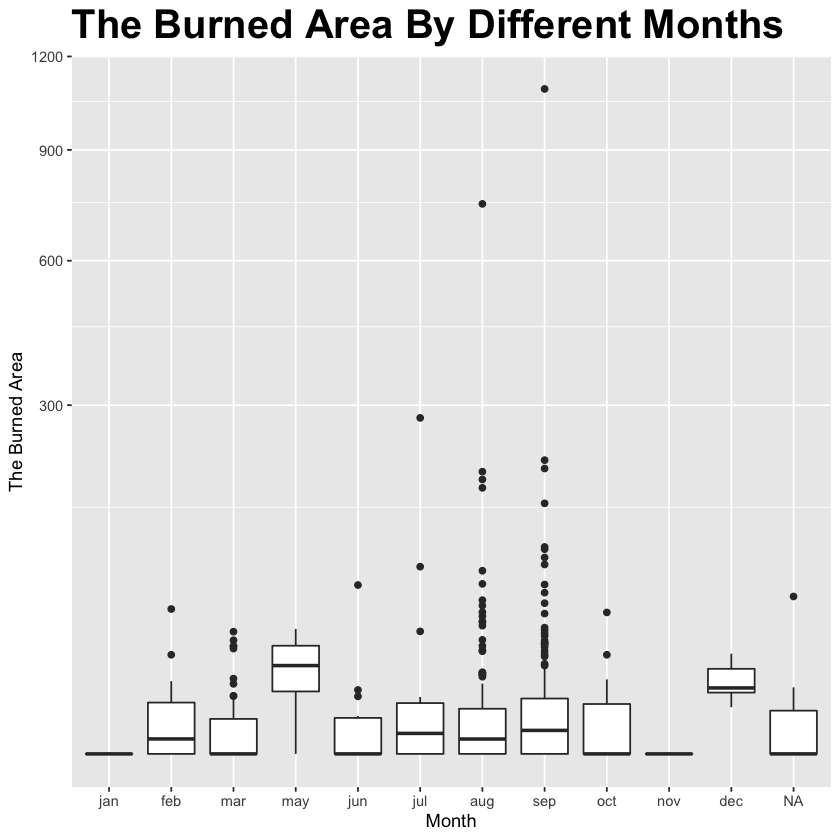

In [122]:
#sort the month 
monthSorted  = factor(forestFire$month, 
               levels=c("jan","feb","mar","may","jun","jul",
                        "aug","sep","oct","nov","dec"))

#plot the graph of month and area
#convert the scale of the y axis for better presentation
ggplot(forestFire, aes(monthSorted, forestFire$area)) + 
geom_boxplot() + coord_trans(y = "sqrt") + 
labs(x = "Month", y = "The Burned Area",
     title ="The Burned Area By Different Months")+
     theme(plot.title = element_text(size=24, face="bold"))

The above plot does not show a clear relationship between `month` and the level of burned `area`. The only observation is the high levels of burned areas durning August, september, and Octover.

**Relationship of Month and Temprature**

Warning message:
“Use of `forestFire$temp` is discouraged. Use `temp` instead.”

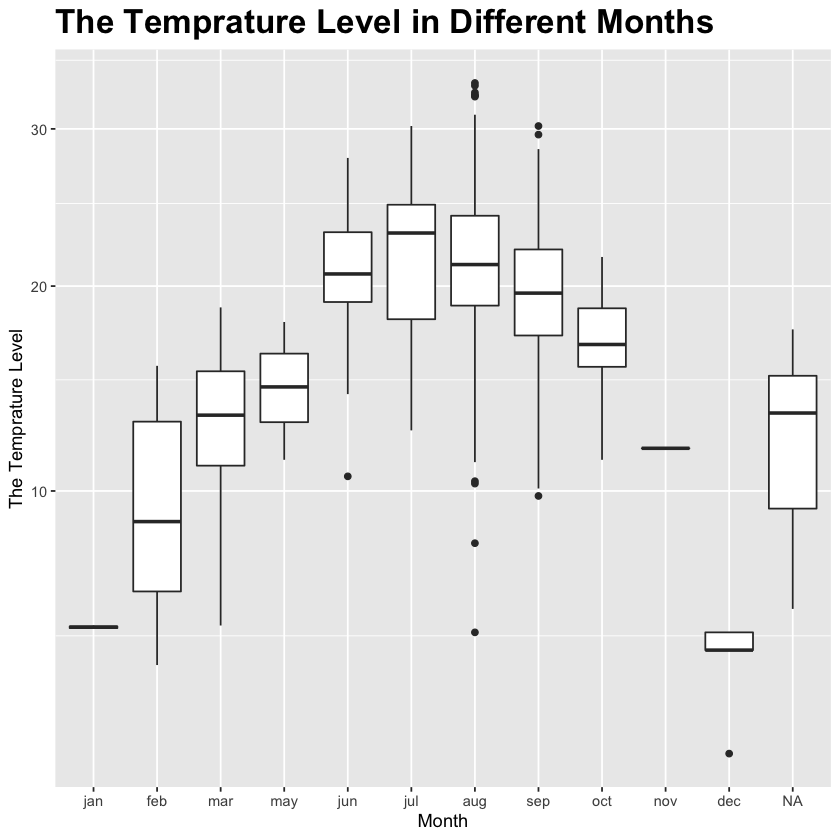

In [123]:
#plot the graph of month and temprature 
#convert the scale of the y axis for better presentation
ggplot(forestFire, aes(monthSorted, forestFire$temp)) + 
geom_boxplot() + coord_trans(y = "sqrt") + 
labs(x = "Month", y = "The Temprature Level",
     title ="The Temprature Level in Different Months")+
theme(plot.title = element_text(size=20, face="bold"))

The above box plot confirms the assumption that `month` has indirect affect on the response `area` through temparture. Since temprature levels vary around the year and impact the levels of burned areas. It can be seen that the temprature levels increase during the summer season from June to August. Then it starts decreasing again to reach its lowest level in december. 

**Relationship of Day and the Response Variable Area**

Warning message:
“Use of `forestFire$area` is discouraged. Use `area` instead.”

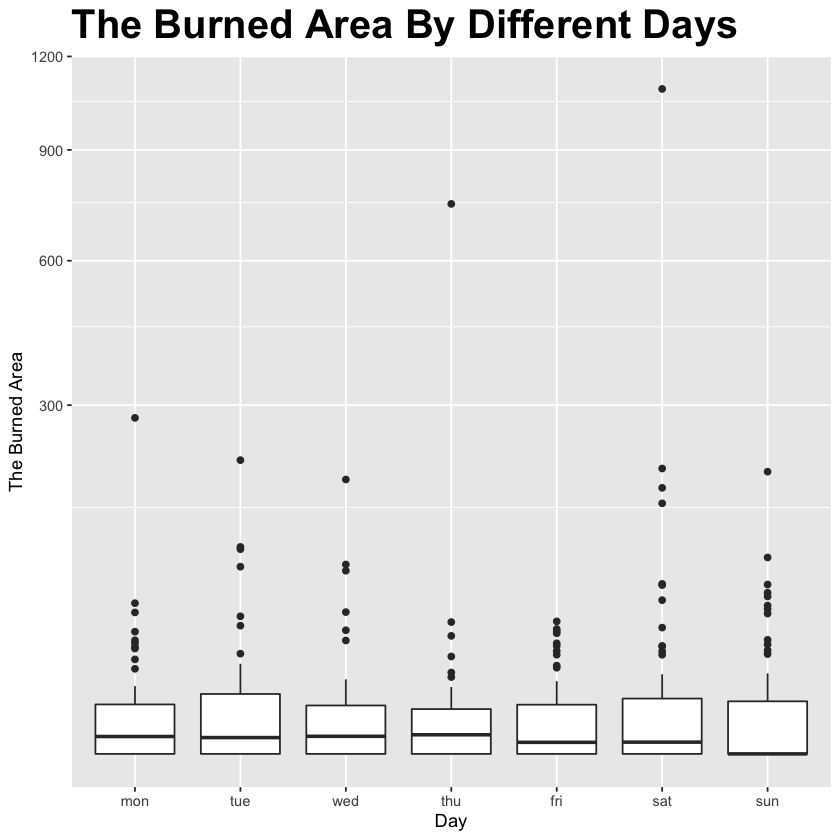

In [124]:
#rearrange the days 
daySorted  = factor(forestFire$day, 
            levels=c("mon","tue","wed","thu","fri","sat","sun"))

#plot the graph of day and area
#convert the scale of the y axis for better presentation
ggplot(forestFire, aes(daySorted, forestFire$area)) + 
geom_boxplot() + coord_trans(y = "sqrt") + 
labs(x = "Day", y = "The Burned Area",
     title ="The Burned Area By Different Days")+
     theme(plot.title = element_text(size=24, face="bold"))



It seemes like there is no clear relationship between `day` and the burned `area`. The plot does not reflect a clear pattern. Additionally, it is safe to say that day does not have a relationship with temprature, since the temprature levels do not change significantly from day to day.  

### 2.4 Outliers Test and Treatment <a class="anchor" id="sec_2.4"></a>

Prior to developing the models the outliers need to be detected and treated. Outliers and influential points can have a high impact on the model, hence the detection and removal of these values can inhance the model performance. 

#### 2.4.1 Outliers Detection Using Cook's Distance <a class="anchor" id="sec_2.4.1"></a>


The first step in detecting outliers using Cook's distance is to create a generalized linear model using all the predictors. Then, the function `cook.distance` is applied to the model to find the high influential points in the dataset using Cook's Distance formula.    

In [125]:
#fit the basic linear model using the original dataset
#and excluding the column logarea
outlierMod=lm(area~.,data=subset(forestFire, select = -c(logarea)))

#apply the cook's distance method on the model 
cooksDistance=cooks.distance(outlierMod)


After Cook's Distance has been obtained, the next step is to plot the data points. The main rule is: <u>if a data point has a Cook’s distance of more than four times the mean, it is a possible outlier</u>.

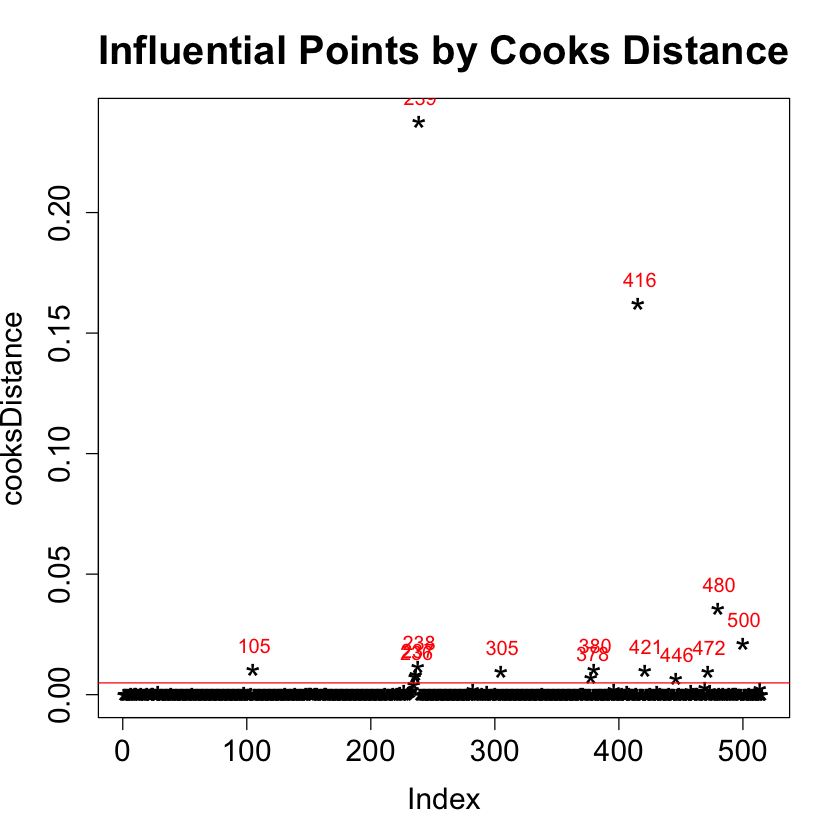

In [126]:
#plot the values of cook's distance 
plot(cooksDistance, pch="*", cex=2,
    main="Influential Points by Cooks Distance",
    cex.lab=1.5, cex.axis=1.5, cex.main=2, cex.sub=1.5)

#setting the cutoff line according to the rule 
#(4 times above the mean)
abline(h = 4*mean(cooksDistance, na.rm=T), col="red") 

#add and place labels to the plot
text(x=1:length(cooksDistance)+1, y=cooksDistance+0.01,
     labels=ifelse(cooksDistance>4*mean(cooksDistance, na.rm=T), 
     names(cooksDistance),""), 
     col="red") 

The above plots illustrates a number of high influence points identified by thier location above the red cuttoff line. 

#### 2.4.2 Outliers Treatment <a class="anchor" id="sec_2.4.2"></a>


This part starts with discussing the high influence data points obtained by Cook's Distance. After that, the points will be removed from the original dataframe to eliminate thier influence on the rest of the data points. 

In [127]:
#extract the highly influential data points
infPoints=which(cooksDistance>4*mean(cooksDistance,na.rm=T))

#count the number of influential data points
cat('The total number of high infulential points is:',
    length(infPoints),'points')

#view the highly influential points 
#exclude logarea attribute 
forestFire[infPoints, -14]


The total number of high infulential points is: 14 points

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
105,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
236,8,6,aug,sun,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48
237,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
238,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
239,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
305,6,5,may,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00
378,2,2,aug,sat,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63
380,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
416,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
421,8,8,aug,wed,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76


The result of Cook's Distance method returns a data frame of 14 records for the original 13 attributes.     
<u>To highlight the interesting observations:</u>
- Most of `FFMC` values were less than the value 90.2, which is the value of the lower hinge. It conforms with the box plot where many values were lying below the lower hinge.
- `DMC` scored a high value of 222.4 in row 416. This value was found to be above the lower hinge in the boxplot statsics. 
- A high value of 6.4 for `rain` can be seen in row 500. It was found in the data exploration part that this is the maximum value for this attribute. 
- As for `area` the value 1090.84 was recorded on row 239, which was found to be the maximum value of this attribute. 



The final step is to drop these outliers to remove their influence on the rest of the data points. 

In [128]:
#remove the influential points from the dataframe
forestFire=forestFire[-infPoints, ]

#the structure of the new dataframe 
cat('The new data structure after removing
     the high influence data points is:'
    ,nrow(forestFire),'rows x', ncol(forestFire), 'columns')

The new data structure after removing
     the high influence data points is: 503 rows x 14 columns

### 2.5 Features Selection Based on Exploratory Data Analysis <a class="anchor" id="sec_2.5"></a>

<u>The below comments discuss the <b>features selection</b> for the models based on the Exploratory Data Analysis.</u>

- The correlation matrix returned a high correlation rate between the variable `temp` and response variable `area`.  Hence, it is important to include `temp` as a predictor when building the models.     


- The variable `temp` has an impact on the burned `area`, as well as on the FWI variables (`FFMC`,`DMC`,`DC`,`ISI`). In the previous analysis, it was shown that `temp` scored a positive correlation with all the FWI variables. As a result, the FWI indicators can be excluded from the model.


- It can be stated that the categorical variables `month` and `day` have no direct impact on the predictor value `area`. The variable `month` seems to have an indirect impact on the predictor through `temp` only.  Therefore, `month` and `day` can be excluded. 

In conclusion, the variables that can be considered in building the models are:
- Geographical location indicators: `X` and `Y`. 
- The weather inputs: `temp`,`RH`,`wind`, and `rain`.

For simplicity, the selected variables names can be assigned to a vector.  

In [129]:
modelFeatures=c('X','Y','temp','RH','wind','rain')

## 3. Model Development<a class="anchor" id="sec_3"></a>

This part consists of data preparatoin for modelling. Additionally, three models are built to predict the predictor value `area`. The three models are as listed below:

- Multiple Linear Regression.
- Random Forest.
- Boosted Tree.

### 3.1 Data Preparation <a class="anchor" id="sec_3.1"></a>

Prior to building the model, the dataset needs to be split into two datasets. The first dataset is the training dataset, and the second one is the testing datase. The training dataset is used to train the model, while the testing dataset is used to test the model's performance. The chosen ratio for the split is 80:20 for training:testing.

In this split, the predictors that will be included to predict the response variable `area` are the predictors selected based on the Exploratory Data Analysis. The predictors are the geographical location variables, in additoin to the weather indicators as follows:
`X`, `Y`, `temp`, `RH`, `wind`, `rain`.

In [130]:
#Set.seed is used to maintain the same output of the split 
set.seed(2020)

#create a subset of the selected variables 
forestFireSub=subset(forestFire,select=c(modelFeatures,'area'))

#--shuffle the dataframe--#
shuffledData <- forestFireSub[sample(503),]


#splitting the new dataset into 80:20 ratio 

#select 80% of the total rows 
split= sample(nrow(shuffledData), size=0.8*nrow(shuffledData),
              replace=FALSE)

#create a training dataset 
#selecting 80% from the original dataset
train= shuffledData[split,]


#remove 80% from the original dataset, the remaining is 20%
test= shuffledData[-split,modelFeatures]

#find the true value of the response variable 
trueArea= shuffledData[-split,'area']

In [167]:
cat('The structure of the training dataset is',(nrow(train)),
    'rows and',ncol(train),'columns')  #size of training set

cat('\n\nThe structure of the testing dataset is',(nrow(test)),
    'rows and',ncol(test),'columns')  #size of training set

#length of the true response variable
cat('\nThe length of the true value of the response variable is',
    length(trueArea)) 

The structure of the training dataset is 402 rows and 7 columns

The structure of the testing dataset is 101 rows and 6 columns
The length of the true value of the response variable is 101

### 3.2 Linear Regression <a class="anchor" id="sec_3.2"></a>

In this section my aim is to build a `Mulitple Linear Regression` model to predict the response variable `area`. I will develope different linear regression models using different predictors in order to reach the optimal model with the best accuracy rate. 

By interpreting the results given by the **summary()** function, the most statistically significant predictors will be highlighted. In addition to the <u>coefficients estimates, Multiple R-squared, p-value</u> and other statsical measures. 

### 3.2.1 Basic Linear Model <a class="anchor" id="sec_3.2.1"></a>


The first model is a basic model where the predictors selected in <u>Exploratory Data Analysis</u> section are used as input variables to estimate the response variable `area`. 

The selected predictors are: `X`,`Y`,`temp`,`RH`,`wind`,`rain` 

In [168]:
#fit the first  Basic Model using the selected features 
linearMod1 <- lm(area~., data = train)

Print the model results using `Summary()`

In [220]:
#the model results using summary 
summary(linearMod1)


Call:
lm(formula = area ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.160  -6.869  -5.312  -0.395 147.620 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.79498    6.59512   0.121    0.904
X            0.44459    0.41938   1.060    0.290
Y            0.45228    0.79913   0.566    0.572
temp         0.14358    0.17486   0.821    0.412
RH          -0.03888    0.06191  -0.628    0.530
wind         0.27594    0.47126   0.586    0.559
rain        -6.91697    8.84305  -0.782    0.435

Residual standard error: 16.5 on 395 degrees of freedom
Multiple R-squared:  0.01381,	Adjusted R-squared:  -0.001171 
F-statistic: 0.9218 on 6 and 395 DF,  p-value: 0.479


The output contains: residuals, coefficients, residual standard error, $R^2$
 , and F-statistic. These statstics are helpful with assessing the model's accuracy. 

* <b>Residuals:</b> This model residuals range between -12.160 and 147.620. It will be further explored using graphical representation.    


* <b>Coefficients:</b>  In general, the linear model shows a positive estimates of `X`, `Y`, `temp`, `wind`. But on the other hand, the variables `rain` and `RH` coefficient estimate is negative which means they have a negative relationship with `area`. As a result, these two variables can be excluded from the next model. The negative relationship has been already highlighted in the EDA section using a correlation matrix. 


* <b>p-value:</b> It can be noted that this model did not produce any high signficance levels for any of the predictors, as all the p-values are relatively high.    


* <b> The Coefficient of Determination $R^2$: </b> In this case, the $R^2=0.01381$ which is considered low but can be improved by trying a single predictor or a different combination of predictors to enhance the model. 


* <b>Adjusted $R^2$*:</b> The Adjusted $R^2=-0.001171$ which is considered low but can be enhanced by selecting a single predictor or a different combination of predictors to enhance the model.


### 3.2.2 Linear Model Enhancemnt <a class="anchor" id="sec_3.2.2"></a>


The previous initial model can be enhanced by testing some techniques to reach the optimal model. The techniques are as listed: 
<p> &#9670; 3.2.2.1 Using Step() function for automatic feature selection.</p> 
<p> &#9670; 3.2.2.2 Building the model using a different set of features. </p> 
<p> &#9670; 3.2.2.3 Log transformation to decrease the variability of data.</p>

#### 3.2.2.1 Step() Function for Automated Features Selection 

 In the following part, a new data split is applied to include all the predictors. Then, a linear model will be fit using the new training dataset. Next, the **step()** function is applied to the linear model to automatically reduce the number of predictors according to thier significance level.  

####  New Split

In [170]:
#Set.seed is used to maintain the same output of the split 
set.seed(2021)

#--shuffle the dataframe--#
shuffledData2 <- forestFire[sample(503),]


#splitting the new dataset into 80:20 ratio

#select 80% of the total rows 
split2= sample(nrow(shuffledData2), size=0.8*nrow(shuffledData2),
               replace=FALSE)

#create a training dataset
#selecting 80% from the original dataset
train2= shuffledData2[split2,]
train2=subset(train2, select=-logarea)


#remove 80% from the original dataset, the remaining is 20%
test2= shuffledData2[-split2,]
test2=subset(test2, select=-c(area,logarea))

#find the true value of the response variable 
trueArea2= shuffledData2[-split2,'area']

In [171]:
cat('The structure of the training dataset is',(nrow(train2)),
    'rows and',ncol(train2),'columns')  #size of training set

cat('\n\nThe structure of the testing dataset is',(nrow(test2)),
    'rows and',ncol(test2),'columns')  #size of training set

#length of the true response variable
cat('\nThe length of the true value of the response variable is',
    length(trueArea2)) 

The structure of the training dataset is 402 rows and 13 columns

The structure of the testing dataset is 101 rows and 12 columns
The length of the true value of the response variable is 101

**Fitting the Full Model**

In [178]:
#fit the full model using all the predictiors in train2
fullMod = lm(area~., data = train2)

#view the full model's summary 
summary(fullMod)


Call:
lm(formula = area ~ ., data = train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.437  -7.492  -3.777   1.324  87.683 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -15.13886   23.28893  -0.650  0.51606   
X             0.52637    0.41487   1.269  0.20531   
Y            -0.79094    0.77297  -1.023  0.30685   
monthaug     13.22145   11.00253   1.202  0.23025   
monthdec     20.30727   10.39607   1.953  0.05152 . 
monthfeb     -1.41028    7.26734  -0.194  0.84624   
monthjul      6.82292    9.51884   0.717  0.47395   
monthjun      0.50639    8.57272   0.059  0.95293   
monthmar     -5.54724    6.76912  -0.819  0.41302   
monthnov     -9.19419   16.72578  -0.550  0.58285   
monthoct     27.57576   13.17330   2.093  0.03699 * 
monthsep     26.10630   12.41747   2.102  0.03618 * 
daymon        1.81726    2.84660   0.638  0.52360   
daysat        2.74106    2.74125   1.000  0.31799   
daysun        4.64140    2.61246   1.777  0.07644 .

Since this model is Multiple Linear Regression, the adjusted $R^2$ is preferred over the multiple $R^2$ as it adjusts for the number of predictors considered. The full model shows an increase in the adjusted $R^2$. In addition to small p-value and a signficant value for `DMC` and `DC`. 

#### Backward Stepwise Regression

The **step()** function offers the approach <u>backward stepwise regression</u>. This approach starts with a model that includes all the predictors, then it automatically eliminates the insignificant predictors. The final outcome of this method is called the reduced model and it is considered to be the best model.

In [179]:
#apply step() function on the full model and call it reducedMod 
reducedMod = step(fullMod, direction="backward")

Start:  AIC=2212.28
area ~ X + Y + month + day + FFMC + DMC + DC + ISI + temp + RH + 
    wind + rain

        Df Sum of Sq   RSS    AIC
- day    6    2111.3 88818 2209.9
- RH     1      47.0 86754 2210.5
- ISI    1     134.5 86841 2210.9
- FFMC   1     134.8 86842 2210.9
- rain   1     172.7 86880 2211.1
- Y      1     241.4 86948 2211.4
- wind   1     363.0 87070 2212.0
- X      1     371.2 87078 2212.0
<none>               86707 2212.3
- temp   1     600.0 87307 2213.1
- month  9    5457.4 92164 2218.8
- DMC    1    2067.2 88774 2219.8
- DC     1    2250.6 88957 2220.6

Step:  AIC=2209.95
area ~ X + Y + month + FFMC + DMC + DC + ISI + temp + RH + wind + 
    rain

        Df Sum of Sq   RSS    AIC
- ISI    1      64.9 88883 2208.2
- FFMC   1      85.1 88903 2208.3
- RH     1     127.0 88945 2208.5
- rain   1     167.2 88985 2208.7
- Y      1     186.4 89005 2208.8
- X      1     325.8 89144 2209.4
- wind   1     375.3 89194 2209.7
<none>               88818 2209.9
- temp   1     785

The output of the step function shows a series of models that have been explored. The final reduced model shows that the best model can be obtained by keeping the predictors: `month`, `DMC`, `DC`, `temp`. 

**Summary of the final reduced model** 

In [180]:
#view the reduced model'summary 
summary(reducedMod)


Call:
lm(formula = area ~ month + DMC + DC + temp, data = train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.538  -7.264  -4.058   0.597  91.551 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  8.46727    6.68243   1.267  0.20588   
monthaug    13.32888   10.37229   1.285  0.19954   
monthdec    19.02204    9.79914   1.941  0.05296 . 
monthfeb    -2.70972    7.14207  -0.379  0.70460   
monthjul     7.21995    8.96098   0.806  0.42090   
monthjun     0.22252    8.14029   0.027  0.97821   
monthmar    -6.28861    6.67010  -0.943  0.34637   
monthnov    -6.84539   16.44750  -0.416  0.67750   
monthoct    27.82174   12.61390   2.206  0.02799 * 
monthsep    25.06430   11.78257   2.127  0.03403 * 
DMC          0.06811    0.02199   3.097  0.00210 **
DC          -0.05276    0.01634  -3.228  0.00135 **
temp         0.32228    0.18274   1.764  0.07858 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.

The model reflects an adjusted $R^2$ of 0.02785 which is higher than our first model (-0.001171) but close to the result of the full model(0.02891). It show a signficance for `DMC`, `DC`, `temp` and some months. The reason for the significance is the correlation between `temp` and the three other predictors as has been proved in the EDA section.    

<u>To futher explore this multicollinearity we can use the Variance Inflation Factor (VIF) test.</u> 

#### Variance Inflation Factor (VIF)

<u>A VIF of 1 indicates no presence of multicollinearity. Usually, a VIF value of above 5 or 10 is taken as an indicator of multicollinearity</u>

In [141]:
#VIF test to explore the multicollinearity between the predictors 
vif(step(reducedMod))

Start:  AIC=2200.39
area ~ month + DMC + DC + temp

        Df Sum of Sq   RSS    AIC
<none>               89803 2200.4
- temp   1     718.1 90521 2201.6
- month  9    5164.3 94967 2204.9
- DMC    1    2213.6 92017 2208.2
- DC     1    2406.1 92209 2209.0


,GVIF,Df,GVIF^(1/(2*Df))
month,43.050295,9,1.232470
DMC,3.374488,1,1.836978
DC,27.560682,1,5.249827
temp,1.870867,1,1.367797


The VIF test returns a high value for `month` and `DC` of 43 and 27 accordingly. With a relatively high score for `DMC` as well. The intial decision to exclude the categorial variable `month` and the `FWI indicatiors` proves to be correct.

####  3.2.2.2 Building the model based on the correlation matrix

It can be noted from the correlation matrix that the variables `X`, `Y`, and `temp` are highly correlated with the response variable `area`. Based on this observation, the second model will use a subset of features that includes these three variables.

In [183]:
#fit the model with excluding RH, wind, and rain 
CorrMod <- lm(area~., data=subset(train, 
                                     select=c( -RH, -wind, -rain )))

#view the model's summary
summary(CorrMod)


Call:
lm(formula = area ~ ., data = subset(train, select = c(-RH, -wind, 
    -rain)))

Residuals:
    Min      1Q  Median      3Q     Max 
-11.810  -6.823  -5.404  -0.545 148.211 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -0.3341     4.0789  -0.082    0.935
X             0.4131     0.4176   0.989    0.323
Y             0.4480     0.7964   0.563    0.574
temp          0.1758     0.1421   1.237    0.217

Residual standard error: 16.47 on 398 degrees of freedom
Multiple R-squared:  0.009909,	Adjusted R-squared:  0.002446 
F-statistic: 1.328 on 3 and 398 DF,  p-value: 0.2649


It looks like removing the columns with low or negative correlation has enhanced the value of Asjusted $R^2$ compared to `linearMod1`. Additionally, the p-value of `temp` has increased which reflects more significance. In the next part, some additional methods will be tested to enhance the model's performance. 

####  3.2.2.3 Synergy Effect (Interaction Effect)

The below model combines the effect of the three variables `X`, `Y`, and `temp` in order to increase thier significant.

In [184]:
#interaction effect using the symbols * and : 
#fit the model
InteractionMod <- lm(area~(X+Y)*temp+X:Y:temp,data=train)

#view the model's summary
summary(InteractionMod)


Call:
lm(formula = area ~ (X + Y) * temp + X:Y:temp, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.652  -7.564  -5.370  -0.077 147.247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.95913   10.24950   0.289   0.7730  
X            1.13779    1.57524   0.722   0.4705  
Y           -1.17339    2.60566  -0.450   0.6527  
temp        -0.54834    0.58246  -0.941   0.3471  
X:temp       0.07370    0.09330   0.790   0.4301  
Y:temp       0.22118    0.14750   1.500   0.1345  
X:Y:temp    -0.02570    0.01183  -2.172   0.0305 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.43 on 395 degrees of freedom
Multiple R-squared:  0.02251,	Adjusted R-squared:  0.007665 
F-statistic: 1.516 on 6 and 395 DF,  p-value: 0.1714


The result of the model shows a significance for the interaction of `X`, `Y` and `temp`, with a low p-value for the interaction. The Adjusted $R^2$ is higher than Adjusted $R^2$  of `CorrMod` and `InteractionMod`. <u>This shows that including an interaction effect between predictors that have positive correlation wiht the response variable can enhance the model's performance. </u>

### 3.2.3 Conclusion of Linear Model <a class="anchor" id="sec_3.2.3"></a>


<u>Summary of the Linear Regression Models.</u>

In this section different models have been tested as listed below: 

- <u>3.2.1 Basic Linear Model:</u> which was the intial model using a subset of predictors that were selected based on the findings from EDA.   


-  <u>3.2.2.1 Step() Function for Automated Features Selection:</u> this section included two models, the first model is the full linear model fitted using all the predictors. The second model is the reduced model using the step() function and backward stepwise regression.


- <u>3.2.2.2 Building the model based on the correlation matrix:</u> this model was built using a subset of predictors based on the results of a correlation matrix.


- <u>3.2.2.3 Synergy Effect (Interaction Effect):</u> this model was built to test the interaction effect on the predctiors signficance and the model's accuracy.   

In conclusion, `the best model was the model built using the interaction effect`. Nevertheless, the overall performance of the linear regression was not strong. 

## 3.3 Random Forest <a class="anchor" id="sec_3.3"></a>

The below part includes <u>a Random Forest Model with 1000 Trees, and 6 variables randomly chosen at each split</u>. The number of variables matches the number of predictors in the dataset train. 

In [207]:
#fit the Random Forest Model using all the predictors 
randomForestMod = randomForest(area~.,data=train, ntree=1000,
                               mtry=6, importance=TRUE)

In [208]:
#display the model 
randomForestMod


Call:
 randomForest(formula = area ~ ., data = train, ntree = 1000,      mtry = 6, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 6

          Mean of squared residuals: 299.0357
                    % Var explained: -10.2

**Variables Importance**

To below codes use the <u>importance()</u> function and the <u>importance plots</u> to view the predictors importance as assessed by Random Forest.

In [211]:
#view the importance measures produced by randomForest Model
importance(randomForestMod)

,%IncMSE,IncNodePurity
X,8.534019,10886.77231
Y,6.130296,7915.09731
temp,17.048708,36999.73200
RH,16.222233,19931.69241
wind,16.713365,13811.14432
rain,3.350960,58.15401


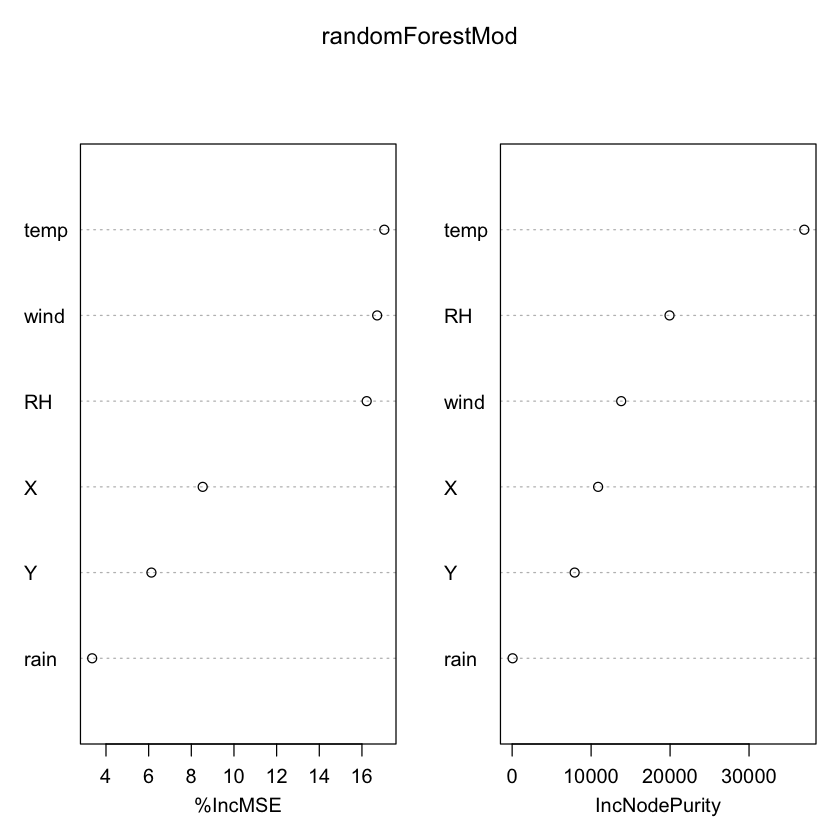

In [212]:
#plot visualisation of variables importance 
varImpPlot(randomForestMod)

The above table and plots show the most important variables of the subset of predictors. The two most important variables are `temp` and `RH`, followed by `wind`.

## 3.4 Boosted Tree <a class="anchor" id="sec_3.4"></a>

The coming step is to train a Boosted Tree model using the `train` dataset. <u>The model is trained with 1000 trees with a gaussian distribution.</u> In addition, the model has two arguments as follows:
- **Interaction Depth:** This argument specifies the maximum depth of each tree(the highest level of variable interactions allowed while training the model).    

- **Shrinkage:** also known as training rate. The shrinkage is the impact of each additional fitted tree. It reduces the size of incremental steps and therefore penalizes the importance of each consecutive iteration.

In [214]:
#fit the Boosted Tree model
boostMod=gbm(area~.,data=train,distribution='gaussian',
                n.trees = 10000, shrinkage = 0.01, 
                interaction.depth = 4)

,var,rel.inf
temp,temp,36.595419
RH,RH,29.544668
wind,wind,15.783181
X,X,10.980464
Y,Y,7.096268
rain,rain,0.000000


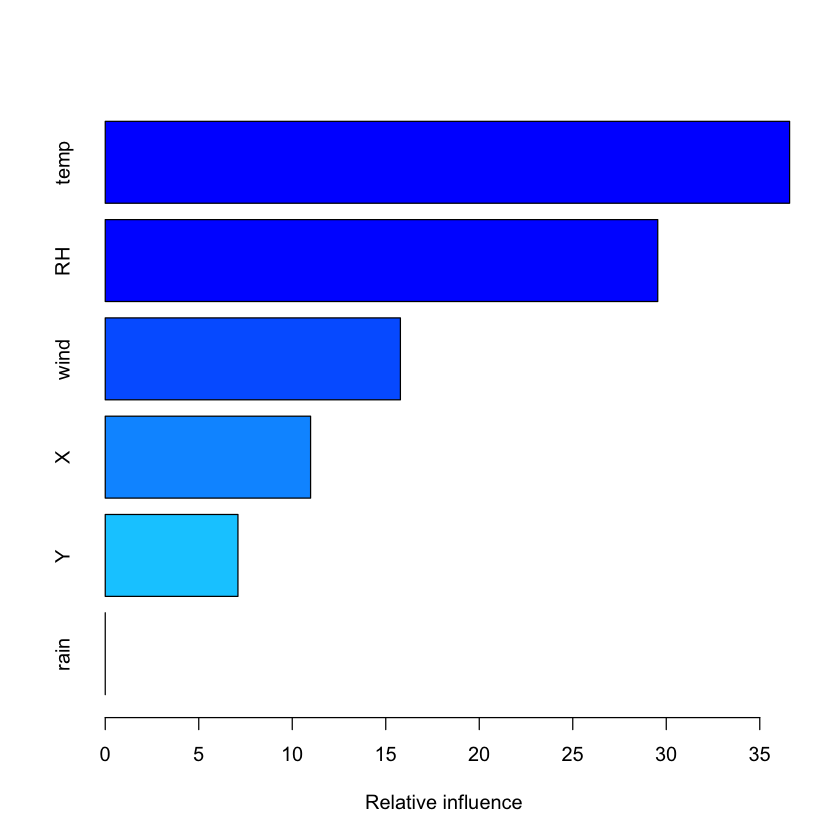

In [215]:
#print the model's summary
summary(boostMod)

The above plot and table show the rank of each predictor according to the predictor's importance and influence in the model. The highest rank was scored by `temp` followed by `RH`. The lowest rank was recorded for `rain`. 

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

In this part, the models from the previous section will be evaluated to explore which model has the best performance. 

<u> The comparison will take a statistcal and a graphical aspect as follows: </u>

- The statsical method consists of computing the `Root Mean Squared Error (RMSE)`.
The `RSME` is calculated to measure the difference between the actual values of `area` and the predicted values by the model. 


- The graphical method includes plotting `scatter plots` of the predicted values vs. the actual values.  

### 4.1 Performance of the Lineare Regression Model <a class="anchor" id="sec_4.1"></a>

This section tests the performance of the <u>Linear Regression Model</u> by using the model to predict the values of the response variable `area`. Then, the `RMSE` is calculated and used to evaluate the model's performance.

The selected linear regression model for prediction is the model produced by the <u>interaction effect</u>. As it has proven in the previous section to be the best linear model.

In [217]:
#the interaction effect model will be used for prediction 
predLinear = predict(CorrMod ,test)

The variable `trueArea` presents the actual values of the response variable `area`. 

In [218]:
#find the RMSE 
mseLinear = mean((trueArea-predLinear)^2)
#find the RMSE by taking the square root of MSE 
cat('The RMSE for the Linear model is:', sqrt(mseLinear))

The RMSE for the Linear model is: 16.64414

**Graphical Represntation** 

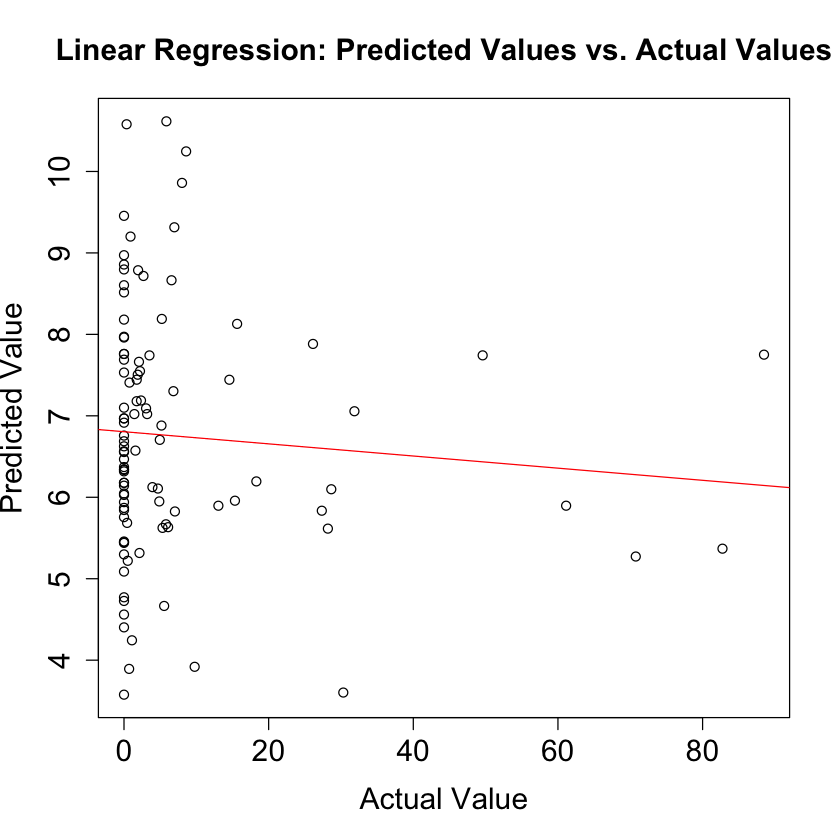

In [219]:
#plot 
plot(trueArea, predLinear, 
    main='Linear Regression: Predicted Values vs. Actual Values',
    xlab='Actual Value', ylab='Predicted Value',
    cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

#fit a line 
abline(lm(predLinear~trueArea),col='red')

The above plot illustrates the predicted values of the response variable against the actual values. The red fitted line presents a linear regression line with an intercept of 6.7 and a low $R^2$ of 0.0001363. It can be noted that the data points produced by the linear regession tend to lie away from the fitted line. Additionally, due to the values of `area` the data points tend to cluster aorund zero.

### 4.2 Performance of the Random Forest <a class="anchor" id="sec_4.2"></a>

The <u>Random Forest</u> model produced in the previous section is used to predict the values of `area` using the testing dataset. The `RMSE` score is calculated to evaluate the model's performance. 

In [158]:
#the RandomForst Model is used to predict the value of area
predRanForest= predict(randomForestMod, test)

In [159]:
#find the MSE 
mseRanForst = mean((trueArea-predRanForest)^2)
#find the RMSE by taking the square root of MSE 
cat('The RSME for the Random Forest is:', sqrt(mseRanForst))

The RSME for the Random Forest is: 18.03157

**Graphical Represntation** 

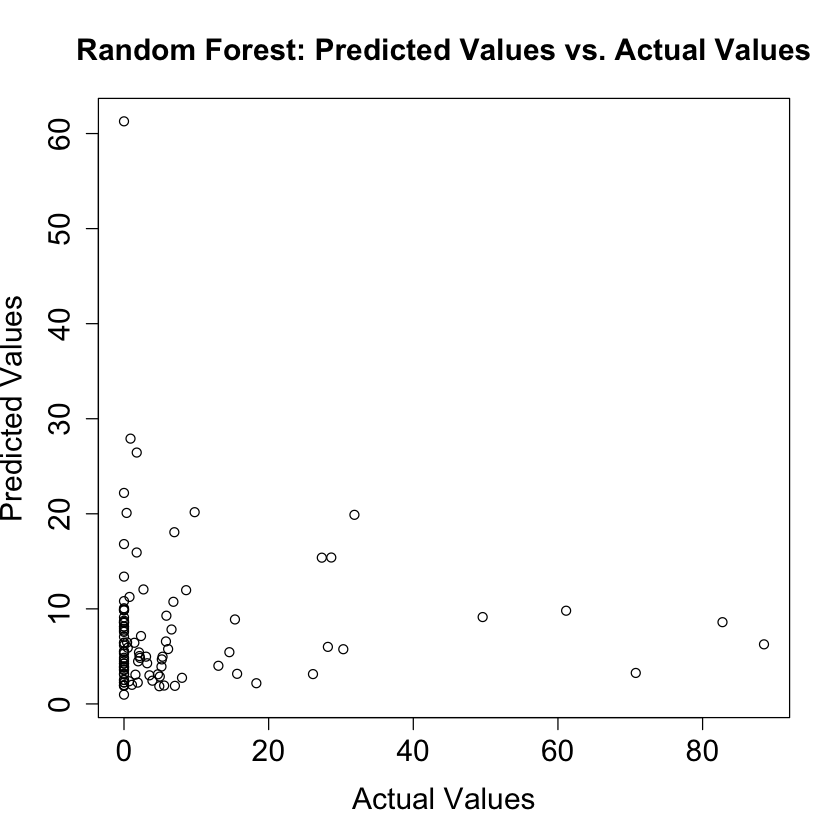

In [160]:
#plot 
plot(trueArea, predRanForest, 
    main='Random Forest: Predicted Values vs. Actual Values',
    xlab='Actual Values', ylab='Predicted Values',
    cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)


The above plot illustrates the predicted values -as generated by the Random Forest model- against the actual values. Given that the actual values tend to cluster around zero,the predicted values cluster around zero as well. 

### 4.3 Performance of Boosted Tree <a class="anchor" id="sec_4.3"></a>

The <u>Boosted Tree</u> model produced in the previous section is used to predict the values of `area` using the testing dataset. The `RMSE` score is calculated to evaluate the model's performance.

In [161]:
#the Boosted Tree Model is used to predict the value of area
predBoost= predict(boostMod, test, n.trees=1000)

In [162]:
#find the MSE 
mseBoost = mean((trueArea-predBoost)^2)
#find the RMSE by taking the square root of MSE 
cat('The RSME for the Boosted Tree is:', sqrt(mseBoost))

The RSME for the Boosted Tree is: 22.71875

**Graphical Represntation** 

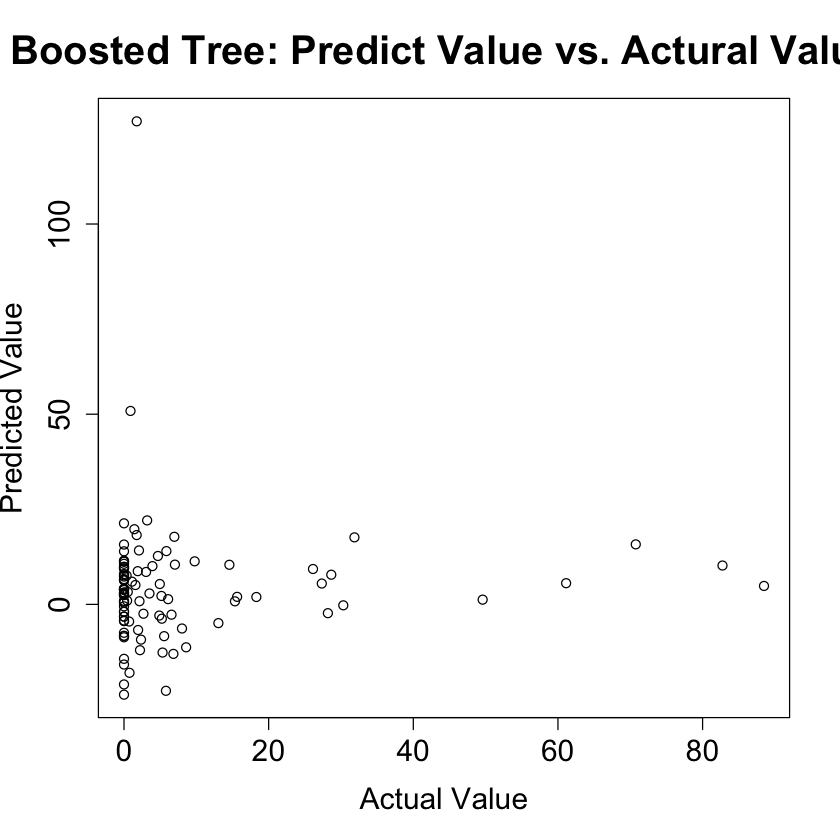

In [163]:
#plot 
plot(trueArea, predBoost, 
    main='Boosted Tree: Predict Value vs. Actural Value',
    xlab='Actual Value', ylab='Predicted Value',
    cex.lab=1.5, cex.axis=1.5, cex.main=2, cex.sub=1.5)


The above graph shows the predicted values -as generated by the Boosted Tree model- against the actual values. Given that the actual values tend to cluster around zero,the predicted values cluster around zero as well.

### 4.4 Conclusion of Models Comparison <a class="anchor" id="sec_4.4"></a>

The `Root Mean Squared Error (RMSE)` is a good indication of models accuracy. As it calculates the difference between the actual values of the response variable and the values predicted by the model. 

In this section, the `RMSE` was calculated for the three models: Linear Regression, Random Forest, and Boosted Tree. The Boosted Tree Model returned the highest RSME result. Hence, `the Boosted Tree model is the best model`.

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

In this section, the variable importance is idnetifed in the light of the `Exploratory Data Analysis` and the `Boosted Tree` ranking. 

### 5.1 Variable Importance by Exploratory Data Analysis (EDA) <a class="anchor" id="sec_5.1"></a>

The <u>correlation matrix</u> is the main method to evaluate the variables important in the Exploratory Data Analysis section. The variable is considered to be important if it scores a high correlation rate with the response variable `area`.

#### Correlation Matrix 

As previously discovered in the EDA section. It can be seen from the correlation matrix that there are three predictors that scored the highest correlatin rates with the response variab `area`. Which are:
- The geographical location indicators `X` and `Y`. 
- The temprature variable `temp`.

### 5.2 Variable Importance by Boosted Tree Model <a class="anchor" id="sec_5.2"></a>

The `Boosted Tree` model has returned the highest accuracy rate in the Model Performance section. Therefore, the predictors ranking produced by this model can be used to view the importance of the variables. 

,var,rel.inf
RH,RH,40.594378
temp,temp,37.422291
wind,wind,8.248069
X,X,7.601294
Y,Y,6.133969
rain,rain,0.000000


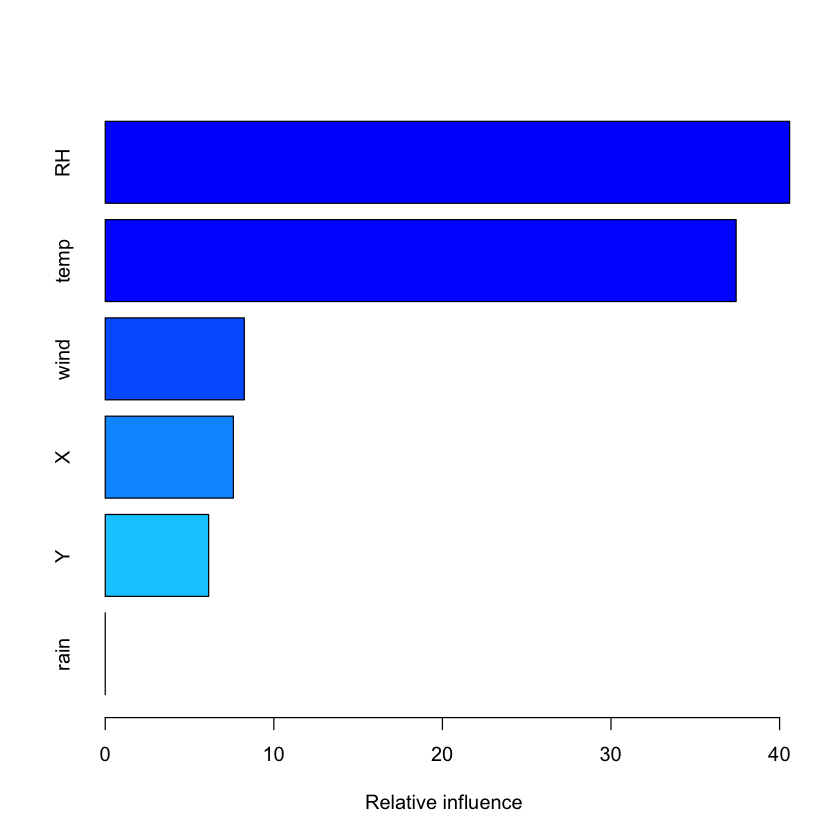

In [166]:
summary(boostMod)

From the above table and plot, it can be noted that `temp` have scored a high rank in the importance rating by Boosted Tree model. The predictor `RH` was ranked to be the most imporant variable given its high negative correlation with `temp`.

## 6. Conclusion <a class="anchor" id="sec_6"></a>

At the begging of this work, the impact of the variables on the burned `area` was unknown. Hence, a series of steps was performed to understand the influence of the attributes on each other and on the target variable `area`. 

The work started with **Exploratory Data Analysis** that consisted of attributes exploration using multiple techniques such as: statstical analysis, and graphical representations. Aditionally, the EDA section included a discussion of outliers detection and treatment, as well as features selection. 

The preceding section was the **Model Development** section, which included three models: `Multiple Linear Rgression`, `Random Forest`, and `Boosted Tree`. This section began with preparing the data to be fitted by the models. As a result, the dataset was splitted into two datasets: `train` and `test`. Then, the models were built using the `train` dataset and the features selected in the EDA section. 

The next part was **Model Comparison**, each model was used to predict the response variable `area` using the `test` dataset. Afterwards, the `RMSE` was calculated for each model to evaluate the model's performance. Additionally, graphical representations such as scatter plots were created to compare the actual values against the actual values. The final result indicates that the `highest RMSE rate` was scored by the `Boosted Tree` model.

The following section was **Variable Identification and Explanation**, this section discussed the most important variables in the dataset in terms of the `Exploratory Data Analysis` outcomes and the `Boosted Tree` ranking. The final output showed that the most important variables were:<u> The geographical location indicators `X` and `Y` as well as the temprature variable `temp` </u>.